In [ ]:
pip install citipy

In [1]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
import random


In [3]:
# Import Linear regression functions 
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [4]:
# Import the NumPy module.
import numpy as np

In [5]:
np.random.uniform(-90.000, 90.000)

-20.188299343288037

In [6]:
# Import timeit.
import timeit

In [7]:
%timeit np.random.uniform(-90.000, 90.000, size=1500)

35.9 µs ± 2.31 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [19]:
def latitudes(size):
    latitudes =[]
    x=0
    while x<(size):
        random_lat = random.randint(-90, 90)+random.random()
        latitudes.append(random_lat)
        x+=1
    return latitudes

# call the function with 1500
%timeit latitudes(1500)
print("check")

4.49 ms ± 123 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
check


In [20]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [22]:
# Add the latitudes and longitudues to a list
coordinates = list(lat_lngs)


In [23]:
# Create a list for holding the citiees
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

611

In [24]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [25]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Parse a response from an API

For each city in our lats_lngs list, we need to retrieve the following data and add it to a DataFrame:

City, country, and date
Latitude and longitude
Maximum temperature
Humidity
Cloudiness
Wind speed

In [26]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [27]:
# Create an endpoint URL for a city
city_url = url + "&q=" + "Boston"
print(city_url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=591679f7c4f2de475d86824b8e92806d&q=Boston


In [28]:
# get JSON object
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 76.89,
  'feels_like': 74.03,
  'temp_min': 73,
  'temp_max': 79,
  'pressure': 1017,
  'humidity': 65},
 'visibility': 16093,
 'wind': {'speed': 13.87, 'deg': 210},
 'clouds': {'all': 20},
 'dt': 1592616339,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1592557633,
  'sunset': 1592612650},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [29]:
# Get the JSON data
boston_data = city_weather.json()

In [30]:
boston_data["id"]

4930956

In [31]:
boston_data["dt"]

1592616339

In [32]:
boston_data["coord"]["lat"]

42.36

In [33]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 79 65 20 13.87


In [34]:
# get teh date from the JSON file
date = boston_data["dt"]

# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds
datetime.utcfromtimestamp(date)

datetime.datetime(2020, 6, 20, 1, 25, 39)

In [35]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2020-06-20 01:25:39'

# Pseudocode for how we will get the weather data for each city for the website.
We will need to do the following:

1. Import our dependencies and initialize counters and an empty list that will hold the weather data.

2. Loop through the cities list.

3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
    Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
     
4. Build the city_url or endpoint for each city.

5. Log the URL and the record and set numbers.

6. Make an API request for each city.

7. Parse the JSON weather data for the following:
    City, country, and date
    Latitude and longitude
    Maximum temperature
    Humidity
    Cloudiness
    Wind speed
    
8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.


# Import Dependencies, and Initialize an Empty List and Counters

In [36]:
# Create an emplty list to hold the weather data

city_data = []

# Print the beginning of the logging
print("Beginning Data Retrival   ")
print("--------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrival   
--------------------------


In [37]:
# Loop Through the List of Cities and Build the City URL
for i,  city in enumerate(cities):
    
    # Group cities in the sets for 50 logging purposes
    if(i% 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | flinders
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | port hardy
Processing Record 6 of Set 1 | preobrazheniye
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | hasaki
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | husavik
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | bodden town
Processing Record 15 of Set 1 | kaitangata
Processing Record 16 of Set 1 | grindavik
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | nyrob
Processing Record 22 of Set 1 | carnarvon
Processing Record 23 of Set 1 | iwanai
Processing Record 24 of Set 1 | gigmoto
Processing Record

Processing Record 38 of Set 4 | cheyenne
Processing Record 39 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 40 of Set 4 | pitimbu
Processing Record 41 of Set 4 | juneau
Processing Record 42 of Set 4 | kosh-agach
Processing Record 43 of Set 4 | bathsheba
Processing Record 44 of Set 4 | victoria
Processing Record 45 of Set 4 | nikolskoye
Processing Record 46 of Set 4 | saldanha
Processing Record 47 of Set 4 | aykhal
Processing Record 48 of Set 4 | mackay
Processing Record 49 of Set 4 | puerto escondido
Processing Record 50 of Set 4 | saint-georges
Processing Record 1 of Set 5 | samusu
City not found. Skipping...
Processing Record 2 of Set 5 | krasnoshchekovo
Processing Record 3 of Set 5 | gorontalo
Processing Record 4 of Set 5 | acari
Processing Record 5 of Set 5 | kathmandu
Processing Record 6 of Set 5 | binzhou
Processing Record 7 of Set 5 | evensk
Processing Record 8 of Set 5 | mehran
Processing Record 9 of Set 5 | ukiah
Processing Record 10 of Set 5 | moronda

Processing Record 29 of Set 8 | hamilton
Processing Record 30 of Set 8 | jizan
Processing Record 31 of Set 8 | urengoy
Processing Record 32 of Set 8 | sitka
Processing Record 33 of Set 8 | sidney
Processing Record 34 of Set 8 | port keats
Processing Record 35 of Set 8 | khani
Processing Record 36 of Set 8 | baie-saint-paul
Processing Record 37 of Set 8 | marcona
City not found. Skipping...
Processing Record 38 of Set 8 | pangnirtung
Processing Record 39 of Set 8 | nuuk
Processing Record 40 of Set 8 | lorengau
Processing Record 41 of Set 8 | arlit
Processing Record 42 of Set 8 | ixtapa
Processing Record 43 of Set 8 | joshimath
Processing Record 44 of Set 8 | marzuq
Processing Record 45 of Set 8 | caxito
Processing Record 46 of Set 8 | laramie
Processing Record 47 of Set 8 | springbok
Processing Record 48 of Set 8 | mocuba
Processing Record 49 of Set 8 | ancud
Processing Record 50 of Set 8 | bubaque
Processing Record 1 of Set 9 | kayseri
Processing Record 2 of Set 9 | la libertad
Process

Processing Record 18 of Set 12 | paiho
City not found. Skipping...
Processing Record 19 of Set 12 | bukama
Processing Record 20 of Set 12 | porangatu
Processing Record 21 of Set 12 | imperatriz
Processing Record 22 of Set 12 | ust-kuyga
Processing Record 23 of Set 12 | wajir
Processing Record 24 of Set 12 | tucurui
Processing Record 25 of Set 12 | bystrzyca klodzka
Processing Record 26 of Set 12 | herat
Processing Record 27 of Set 12 | otane
Processing Record 28 of Set 12 | itaueira
Processing Record 29 of Set 12 | lincoln
Processing Record 30 of Set 12 | petropavlovka
Processing Record 31 of Set 12 | brownsville
Processing Record 32 of Set 12 | banda aceh
Processing Record 33 of Set 12 | sola
Processing Record 34 of Set 12 | wahran
City not found. Skipping...
Processing Record 35 of Set 12 | balabac
Processing Record 36 of Set 12 | kushmurun
Processing Record 37 of Set 12 | southbridge
Processing Record 38 of Set 12 | kamloops
Processing Record 39 of Set 12 | gornozavodsk
Processing R

In [38]:
len(city_data)

560

In [39]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Flinders,-34.58,150.86,66.99,67,22,10.00,AU,2020-06-20 01:27:05
1,Jamestown,42.10,-79.24,72.00,100,90,3.36,US,2020-06-20 01:23:46
2,Ushuaia,-54.80,-68.30,37.40,93,40,4.70,AR,2020-06-20 01:27:05
3,Busselton,-33.65,115.33,37.99,92,0,10.80,AU,2020-06-20 01:27:05
4,Port Hardy,50.70,-127.42,64.40,82,90,5.82,CA,2020-06-20 01:27:05
5,Preobrazheniye,42.90,133.91,56.62,78,86,5.93,RU,2020-06-20 01:27:06
6,Longyearbyen,78.22,15.64,41.00,76,20,10.29,SJ,2020-06-20 01:27:06
7,Mataura,-46.19,168.86,48.18,72,79,1.32,NZ,2020-06-20 01:27:06
8,Hobart,-42.88,147.33,54.00,87,75,4.70,AU,2020-06-20 01:23:21
9,Hasaki,35.73,140.83,81.00,69,40,3.36,JP,2020-06-20 01:27:07


In [40]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Flinders,AU,2020-06-20 01:27:05,-34.58,150.86,66.99,67,22,10.00
1,Jamestown,US,2020-06-20 01:23:46,42.10,-79.24,72.00,100,90,3.36
2,Ushuaia,AR,2020-06-20 01:27:05,-54.80,-68.30,37.40,93,40,4.70
3,Busselton,AU,2020-06-20 01:27:05,-33.65,115.33,37.99,92,0,10.80
4,Port Hardy,CA,2020-06-20 01:27:05,50.70,-127.42,64.40,82,90,5.82
5,Preobrazheniye,RU,2020-06-20 01:27:06,42.90,133.91,56.62,78,86,5.93
6,Longyearbyen,SJ,2020-06-20 01:27:06,78.22,15.64,41.00,76,20,10.29
7,Mataura,NZ,2020-06-20 01:27:06,-46.19,168.86,48.18,72,79,1.32
8,Hobart,AU,2020-06-20 01:23:21,-42.88,147.33,54.00,87,75,4.70
9,Hasaki,JP,2020-06-20 01:27:07,35.73,140.83,81.00,69,40,3.36


In [41]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV 
city_data_df.to_csv(output_data_file, index_label='City_ID')

# Modify the .gitignore File.

In [42]:
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Flinders,AU,2020-06-20 01:27:05,-34.58,150.86,66.99,67,22,10.00
1,1,Jamestown,US,2020-06-20 01:23:46,42.10,-79.24,72.00,100,90,3.36
2,2,Ushuaia,AR,2020-06-20 01:27:05,-54.80,-68.30,37.40,93,40,4.70
3,3,Busselton,AU,2020-06-20 01:27:05,-33.65,115.33,37.99,92,0,10.80
4,4,Port Hardy,CA,2020-06-20 01:27:05,50.70,-127.42,64.40,82,90,5.82
5,5,Preobrazheniye,RU,2020-06-20 01:27:06,42.90,133.91,56.62,78,86,5.93
6,6,Longyearbyen,SJ,2020-06-20 01:27:06,78.22,15.64,41.00,76,20,10.29
7,7,Mataura,NZ,2020-06-20 01:27:06,-46.19,168.86,48.18,72,79,1.32
8,8,Hobart,AU,2020-06-20 01:23:21,-42.88,147.33,54.00,87,75,4.70
9,9,Hasaki,JP,2020-06-20 01:27:07,35.73,140.83,81.00,69,40,3.36


In [43]:
city_data_df.count()

City_ID       560
City          560
Country       556
Date          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
dtype: int64

In [44]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [45]:
import time

# Plot Latitude vs Temperature

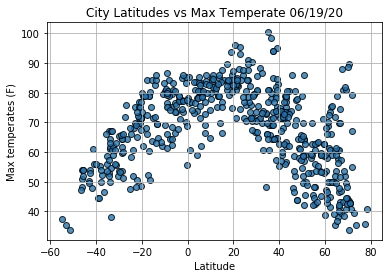

In [46]:
# Build scatter plot for Latitude vs Temperature
plt.scatter(lats,max_temps,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate graph prdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYUAAAEWCAYAAACJ0YulAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nOydeXyUxfnAv7P3bjabZMlNEoIEkKsgIqACghYFT7QeFYsWK6A/j6ptpbWoeLViK1qLrYrVeiHihQcGtSgKKsghyhkIEI6EXITN5tjNXvP7491dNmFzkoQE3+/nk09232PmmXnfnWfmeWaeEVJKVFRUVFRUADQnWgAVFRUVla6DqhRUVFRUVMKoSkFFRUVFJYyqFFRUVFRUwqhKQUVFRUUljKoUVFRUVFTCqErhBCKEuFcI8cKJlqMh7S2XEGKuEOK19kpPRUWl41CVQgcjhJgqhFgvhKgWQhwSQuQKIcYASCn/IqW8KXhdthBCCiF0bczn10KI1W24b7wQ4mDksfaUqysTUbaNDY4nCiE8QoiCds7v3uB7UC2EcAsh/BHft7ZnXp2NEOJmIcT/jjONG4QQ+4P18bYQIq7B+euFEHlCiBohRL4QYlSD8w8JIe4XQsQIId4RQuwLPt/RDa6zCyFeF0KUCSFKhBD3RpHlXCHE50KIdCHEkuBvt1II8ZUQ4vTWyN3dUJVCByKEuBt4CvgLkAJkAf8CLjuRcqkcQ4wQYnDE96nA3vbOJKhsrVJKK3Az8G3ou5RyUHvn1150RodACHEa8DRwDZAGCOAfEecvBuYC1wFWYAKwv0EyFwIfAxL4EuU5HomS3TPBa7KAs4FZQohrG0krFlgNDAPswFvAMiGEsSVyd0uklOpfB/wBcUA1cFUT18wFXgt+3o/yolYH/84BKoAhEdcnAy4gKUpavwZWN5LPdGA7UAXsAWYFj8cE0wtE5JvejFxnRp4PXpMdvEYX/N4b5UdZBXwGLGhw/WjgG8AB/ACMb1COPcF79wLXRSlPelBue8Sx04ByQA/kBPOvDB57s5F6Cck9B/hbxPH1wJ+BgohjfwR2B+XaBlwece7fwNsR3+cBKwDRxLOP+ryAwcDnKI3ZdmBKxLnFKA3OZ0ANsDL4TvwrWJdbG7wvxcA9wI7gu/Q8YIw4fznwY/DeVcDABvf+PphmbfDY/cFnUgVsAS6KqHs34Au+I8XB42aUTtGBYHr/jMy/QbnnAy9GfB8UfMam4PeN0d6FiOtTgEMN6zz4/Ec3OFbVoJ4eAj5rcM22yPqIOC6CZR3UErm74586Uug4zgRMwHstvH5c8H+8VHqOX6I0Ar+KuOZa4H9SyrJWylIKXAzYUBTEk0KI4VLKGmAyUCSP9liLmpHr2xbktwjYACQCDwM3hE4IIXoCy4BHUHpevwfeEUIkCSFiUHpdk6WUscBZwKaGiQdl/Bb4RcThqSgNszeY56dAApCB0hg1xWvAL4UQWiHEAJTe4doG1+wGxqIo+weB14QQacFzvwN+FjThjQV+A9wgg61ESxFC2FAa/P+g1N31wItCiJyIy65BqbNEQAesQVGAPVB6to83SPZa4FygP0rj/YdgXqNRlMn04L2vAksbjAquASYGzwPkoTyTOBTFt1gIkSil/B64E1gZfEdSg9c/iVL/Q4L590NRrtEYhNJBAEBKuRXQAn2CvfJhQLoQYo8Q4oAQ4slQbz3IZGB5K+pcNPgcHikKIbIBs5RyW5T7RgF+jo4kG5W7hXJ0OVSl0HH0AMqllL7jSONlYKoQIvScpqH8eFuFlHKZlHK3VPgSpcEcexxyNYoQIgs4A7hPSlknpfwK+DDikl8BH0spP5ZSBqSUn6H0zC8Mng8Ag4UQZinloeCPLBqLUBo8hBAC+GXwGIAX6AWkSyndUsrmfC0HURq8n6MosFcaXiClfEtKWRSU+U1gFzAyeK42WK75KArmdinlwYZptIDLgS1SytellH4p5TqUuotUfm9JKX+QUrqA94FKKeWbUko/sASl4Y/kH0G5y4C/EqwzYBawQEq5IZjX84ARiLSXPxm81xUs55vBZxKQUr4KFDa4PkxQudwI/FZK6ZBSVgKPoTynaFhRRnaRVKEo6J4oDfcVKKPMEShmn3sirr0IRSm2hE+APwV9D/1RnrmlubSEEAnAf4E5wWfenNzdElUpdByHgcTjscdKKdeimAnOEUKcimIW+aC16QghJgsh1gghKoQQDpQGOLGtcjVDOnAkOAoJsS/icy/gKiGEI/QHjAHSgvdcg2JvPySEWBYsdzTeBs4UQqSjjGYkigkElMZCAN8JIbYKIW5sgdyvoJh0rkVp2OsRdHJuipB5MBF1KKX8DsXsJVAa57bQCxjXoG5+gWKrDlES8dkV5bu1QZoHIj7vQ3k+obzubZBXEkoDHO1ehBC/EUL8GHF9Do2/R+koprytEdcvRTF3RaMaZSQbSSxKA+sKfn9KSlkqpSxBMaNdGJRLB4xH6ey0hFtQ2r49KD6C11E6BiFC/oQwQghr8NhnUsonWyh3t+Skm1HShfgWxfY4BaUBa47Ghr0vo/RCi1HMI+7WCBEcYr+DYop4X0rpFUIs5ejwubnhdrTzNdTvWaVGfD4EJAghYiIUQ1ZEOgeAV6WUM6JmJuUnwCdCCDOKiWkhUUY1UkqHEOJT4GpgAPBGyHQgpSwGZgAIZabX/4QQX0kp85so5zsovo8NUsp9Qoi+oRNCiF5BOc5DcQ77hRCbiDBBCCFuRelpF6Eopb82kVdjHAA+lVJe0oZ7GyMz4nMWinyhvJZJKZ9o4t7wsxdC9EMxw50LfCelDAghdtD4e3QIxcfQR0p5uAVybgWGRuQ3EMVMs1tK6RZClEfJI8TZwNbgaKRZgqOmayLymg98F/xsQhmNXBlx3owyYtsB3NFSuVsiS1dEHSl0EMEX9H7gGSHEFCGERQihD/baG9p9AcpQTCenNDj+KopZ4VdEMWs0QAghTJF/gAGlsSoDfEKIycD5EfeUAD2amEYXTa5NKD3arOB9f4oo9z4Uc9CDQghDsFGObOReAy4RQlwQtOGbhDItNkMIkSKEuDToW6hD6YX5myjvIhRl9wuOmo4QQlwlhMgIfj2C0pg0lQ5BBXYucFOU0zHBNMqC6U+nvg26H4oC+xWKie8eIcSwpvJrhKXAaUKIa4LvikEIMTqYflu5QwiRJoRIRLHnvxk8/jxwuxBihFCwBuve0kg6VpT3oAzQCCFuRhkphCgBMoUQeoCgb+dF4B9CmeIrhBCZQoiJjaT/GvCLYHmtKH6bNyM6QS8BvxVC9AiW5Xbgo+C5Y8w9Qghj8P0HMER8RgiRI4RIEELohBCXopiP/hI8fS6wNmQyC3aqlqL45W6K4rNoTu7uR2d5tH+qfyhT6Naj9K6LUZysZwXPzaX+rJyHUH50DiJmTAD/AwpofjaLjPKnA25F+dE6UJTMYuCRiHtfRDF3OWgw+6gxuVCm9TmAfJReeeTso1NQTDnVRJ99NArFOVoRTHcZSi82jaOzhhwos2uOmQESkY4ZZZi+tcHxx1Hs3dUoPbaZjdyfHSl3g3M/p/7so0eD8paj+A6+RFEgOpRe5h8jrr0F2EwjM20inle02UeDgOXBfMqDzz4002Uxij07dO1tKM7V0PfBQHXE98jZR0eAF4iYFQNcijIhoBJlBLEYxcEaundMA9n+HkynDMXRvAb4VfCcCcVWfwQ4GPF8Hkd5d50ovepbmqmTgyi/lXeAuIhzRpTRWiXKKOQJwBA8twUY3CCtYo79LaQGz00Lnq8Nlv/ciPsWALdFfL8geG8tR2fgVQNntETu7vgngoVS6cIIIV5EmSE050TLotJ9EEIUA1fK5h3t3RahTGxYJaXs1U7p7QYmSin3tEd63RHVp9DFEcr0uCs4dlaJioqKYtb6fXskFDSdPftTVgig+hS6NEKIh1GGxn+TUrb7ClsVle6OlHKblPKtdkqrVkr5t/ZIqzujmo9UVFRUVMKoIwUVFRUVlTDd2qeQmJgos7OzAaipqSEmJubECtQGVLk7l+4od3eUGVS5O5vWyL1hw4ZyKWVS1JMnevrT8fydfvrpMsQXX3whuyOq3J1Ld5S7O8ospSp3Z9MauYH1spF2VTUfqaioqKiEUZWCioqKikoYVSmoqKioqIRRlYKKioqKShhVKaioqKiohFGVgopKF8fpdDLxoinkDBrGxIumkJu7/ESLpHIS063XKaionOzk5i7nQFEx7oEX039iDs7CfO6aOw+AyZMnnWDpVE5G1JGCikoXZv6CZ9FZ7cRnnYpGqyM+61SSxl3H/AXPnmjRVE5SVKWgotKF2VtQgNZgqnfM1jOHvQUFJ0YglZMeVSmoqHRhemdn4/fU38TLWZhP72B4FxWV9qbDlIIQ4kUhRKkQYkvEMbsQ4jMhxK7g/4TgcSGEeFoIkR/cGHx4R8mlotKduPu2m/FVV+DYv4OA34dj/w7Kvnqdu2+7uU3p5eYuV53WKk3SkSOF/wINPWF/BFZIKfsCK4LfASYDfYN/M4F/d6BcKirdhsmTJ5GZnopp20fkLbwT07aPeHLu7DY5mXNzl3PX3HmK03rGU7gHXsxdc+epikGlHh02+0hK+VVw17BILgPGBz+/jLIH7+zg8VeCgZrWCCHihRBpUspDHSWfikp3wWaz8dmypcedzvwFz5I07jris04FUP4HndbqTCaVEJ3tU0gJNfTB/8nB4z2BAxHXHQweU1FRaSWNmYj2FhRg65lT71rVaa3SkA7deS04UvhISjk4+N0hpYyPOH9ESpkghFgG/FUGNxgXQqwA7pFSboiS5kwUExMpKSmnL168GIDq6mqsVmuHlaWjUOXuXLqj3K2R2el0cqCoGJ3VjtZgwu9x46uuIDM9lZLSMgKmuHqzmfweNxp3JX1z+pxQubsSPwW5J0yYsEFKOSLauc5evFYSMgsJIdKA0uDxg0BmxHUZQFG0BKSUzwPPA4wYMUKOHz8egJUrVxL63J1Q5e5cTpTcubnLmb/gWfYWFNA7O5u7b7u5xSab1sg88aIpuAdeTHxWaviYY78D04cvcvdtN3PX3HkkjbsOW09lIVzZV6/z5NzZHVIn6jvSubSX3J2tFD4AbgAeC/5/P+L4bUKIxcAooFL1J6icLIQcvEnjruvwVcl7CwroP/FYE1HexwXhvOYveJa8jxXl1FantcrJS4cpBSHEGyhO5UQhxEHgARRlsEQI8RtgP3BV8PKPgQuBfKAWmN5RcqmodDad6eDtnZ2NszA/nBfUX9cwefIkVQmoNElHzj66tpFT50W5VgK3dpQsKionkqZ67+1NyEREFBORikpLUAPiqah0MKHeu6e6kr3ffIirohi9xUavOEu759VSE9Hx+DhUTm5UpaCi0sHcfdvNzLhzNk6/Hvu4adh69KR27w8czvuU3Nzl7d4YN2ci6kwfh0r3Q419pKLSwUyePInkBBsJp18EBjPaumpyho2m16QZJyTaaaSPQ428qtIQdaSgotIJOKuqGHzmBDTaoz+5gDWmQ/wKzdGZPg6V7oc6UlBR6QRCfoVIGot22nBFstPpPGGyqPz0UJWCikoncPdtN1P21evNRjuNFrTuQFFxuwata6ksKj9NVPORSremu8yiaemsoGhrGnTW4nZd0xApy8Ylm/EGwKDXhX0KXbH+VDoPVSmodFu62yyaliwc21tQQNrIZHbuyqfO48FoMMCZCe0etC4kR8OwF125/lQ6B9V8pNJtOVln0eR9/y0ujRkRm4zPEEudqwZbbGy753Oy1p/K8aEqBZVuy8kWCjo3dzmFRYeo+mE5viOHkEBtyV78tZXIgL/d8zvZ6k+lfVCVgkq35WSbRTN/wbNoTFZ6jLqcqu/eofj12VStew+tKZaqmtp2z+9kqz+V9kFVCirdlpNtFs3eggJikjLQxcSTceWf6f2bf5Bx5RwQokMa6pOt/lTaB1UpqHRpmtpofvLkSTw5d3a77F/ckTRVhkh6Z2eT1O80HF+/gatoJzLgp2b/FgK1jg5pqLtL/al0LursI5UuS0tmF3X1UNCtmSEVinDac/Aoyta9Q1nZQTTSR8rkxzqsjF29/lQ6H3WkoNJlORlmx7SmDKGee7qrAJu/krOGD2HJS8+RlpbWafJGjmpOG3kWw0ePbXaEo3JyoY4UVLosJ0OMntaWIVrPfeXKlR0kXX0iRzUJGRXkrViCddhk+gw5A3d1qbqG4SeCOlJQ6bKcDLNjWluGlvof2puHHn6Ey6feQP62H1n334fZ8fGL2M+5npg+wyk9XNEtR2kqbUNVCipdlpNhdkxryhAt7tFdc+e1e0C8hjz08CPMe+5V4if9loxbXiTh/P/D5SgHSzxavYk6jwc4dg3DiVJgKh2Laj5S6bKcDBvNt6YMDeMeibg0XNnj2L23gIkXTemwuE5PP/8S9nNvRpfSF4QGU9Zg9ImZ1Ozfiv7U0UqoDeqPcLpbiBGVlqMqBZUuzckwO6alZYj0P1RWVnKgqBh91hAQJeFRQyi99qTK6aRHxgAkAo/XiwBsIy7jyJcvo9cb6DPkjPAIJ7TXc7TAfQTNS939ef3UOSHmIyHEb4UQW4QQW4UQdwaP2YUQnwkhdgX/J5wI2VRUThSR/oeS0jJ0sXZ8FUVodPp2s+lHM/nE2mzUHtyOVqvFoNdDwI/QGaDWQerBlRxacv8xaxj2FhTgdlaw9oU5rHz8Jta+MAe3s6LJEBmqual70OkjBSHEYGAGMBLwAMuFEMuCx1ZIKR8TQvwR+CMwu7PlU+m6tDVMduR9s++6HZfL3abebHuH6W6YXmqPOJa++jABoYMYO9Y+p1O37weM59wJla2fedUw/bGjR7DooxXh2UUbVr7N5VNvIN5q5vD/FsLPZ2DJGICvZBdVq15mzuzfcf99c6KmHRtjIW/FEuznXI89tQ/u4t3krXiFPnZLo7Ko5qbuwYkwHw0A1kgpawGEEF8ClwOXAeOD17wMrERVCipB2tqoNLwvYCpvU2PU0vyjNcSr1qw/RpE0TK9g9VK++TyXzMm3EIhJ4siBPCrXLaXX8PHoTDFQ2bqZV9HkfeKF+WSccT6e6kp2ffke8WN+hd2ejnf/Zixfv4rz039S6nIRa7Mxe9b0RhUCgNBosQ6bjD4xE4QGfWIm1mGTEQdXRr1eNTd1H4SUsnMzFGIA8D5wJuACVgDrgWlSyviI645IKY8xIQkhZgIzAVJSUk5fvHgxANXV1Vit1o4vQDujyt0yduXvJmCKQ2swhY/5PW407kr65vRp8X3xej+Ha7zN3teW/J1OJweKitFZ7WgNJrzuWtyOMgxWG0ZrAn6PG191BZnpqZSUltVLr6a8CI0lDo1Wh9FoxO/3U+eqIeBykpGexuEab/hem83WJnlrqyqRddWAQBMTj0avnAv4PBg0tKpOftyyFY0thUCw/dAIgV6vx1tRyOBBA4H678iWrdvQxvbAU11JwO9Fo9VjsMbhrzocvr6r8FP4TU6YMGGDlHJEtHOdrhQAhBC/AW4FqoFtKMphekuUQiQjRoyQ69evB5QFPuPHj+8wmTsKVe6WkTNoGP1nPFV/43u/j7yFd5K/dVOL77ssxcF7RdZm72tL/hMvmoJ74MXh3vDOXfnUOsqo+2EZo256BADH/h2Ytn2kOJUj0lv5+E2kT/s7dRVFDAk2ko6KCr7/5ywee/A+3v/401aZq6LJm5eXR+E7f0Gj09Pz+icQGi0+jwuNq5KcU7JbXCe5ucu5evos4s+/jZiswfi9bnxVFcTLKhL3r+SzZUuVMkW8I6eNPIvdFR7s51yPKWhuqvjyFfrYDXz/3TctKlNn8VP4TQohGlUKJ8TRLKX8j5RyuJRyHFAB7AJKhBBpAMH/pSdCNpXOpyUOyLYuZGuvBXAtSafh/gR1Hg+WjAG4KorDx0Jz/RumZ7anUntwe3j6JwDVpZw5ahSDBw3ks2VLW2VmiSZvjL8KjfSht9hwH8rH53Hhq6ogJTkpXJaHHn6ExMw+GOOSSMzsw0MPP3JM2vMXPEvWmMupXPM2zn1b8Xj9uByl7Prw342uIWnM3FRVU8vw0WOxJqZhTUzntJFnqQ7oE8yJmn2UHPyfBVwBvAF8ANwQvOQGFBOTyklOYwu2GjYMbV3I1vA+v8fd7H3RlFRz+efmLsfhrGLjqk/Ztn0H23bswOv1UrnnB/yGWHbuyqeysjLc+DZML6nvMCo+fwGL10HA7+PgtvX8uGQ+W7ZsZlf+7lY3lNHkdW18nz/cOoNecTpKly/AU7CJjJQkZOUhyr56ndQeccx77lXME24m+9aXMI65kUefeYkeqZn1lPXeggLsQ87F3O8snOveo2Txn6ne8CEeR+P9OGdVFX2GnIHGVYm7/AAaVyWpOYM4UFhEccZ4Uqf/k8RLZ7O7wsOMO2eTm7uc3NzlnDbyLKyJ6VgT0xg+eqyqMDqBE7VO4R0hRA/AC9wqpTwihHgMWBI0Le0HrjpBsql0Ii11QLZ1IVvD+zR33d7kfY05lJ+cO5sn586Omn/onpRRl7B/Yy7+oZMxZg7GV12M46uXMZ8yAg868jetQZf3Kc89/mDU8lwzaxqr1qxk0yf/xlnrJmvM5WSPmdIm53hT9XX/fXOOOsSXvB8+N23mrdjPvRlrryF4XdUIWzIJ586ket079dZJ9M7OZue2DdgGjcN+2gUAuIp24lz9WqOO497Z2birS+nX99TwsR9Xf4YuPo2YPsPRGczoe/bHfs71OFe/xr0PPERZZQ1Ov57ES2ej69GT4r0/MOueB3iuFfWg0npOiE+hvVB9Cq2nvaZVtpfcbfUVtJXm5G7oF4CjfoCQrbype1Y9+X94hQFfTSVaawIxGQOoPbAV7+EDWFN60StO16wNfeJFUygyZ1O2axOuimIe+dPd/OPjjTh/+Ix4W2y7TIeNhjEuiexbX0Kj1VFdXojWEg9aPYdevovz57wcroe7b7uZX/zmdpIn3YYpLQd38W4cX79B33Mu58jqReHnFlnXubnLmXXPA4iBkyAuFSqLKf3qdWKHTcZ++oUIIQCQAT8HX/4duJ0YemRgG/MrzOn9APB5XHgKNtGv+odGn0V78FNoS5ryKagrmn9CdMW54iHbd2QjfCKD3rUlMmvkPX6vh8zr/4qrrg5fZSm21GxkwE/hK7/jzFseJ2/hnc3KsGXLZlzmYuLPnoo9tQ8aSw3F29YTqHEx6nf/6bDnFlrEZu01BOnzIvQm6oryMMQlAkfrYfLkSfTPSGLf169zuNaJ2Z5K/wlXYrDGNfncAh43tZty8dQ4McTYwF2FISYOv9eNzmAGwF28G0OMDY+7Ek+NE1Pq0dlQWr0J4lLZu0W1LHckakC8nxDtvT9Be6xQ7WpB79rimI68x2xPxV28G/w+NBotoDR0Zntqi5WdNwCxI3+BOb0fQqMFnQHb6KtAq+/QfSXumDmdis9foHrfZtBocO3fguPrRfQafRFQvx7+8uD9JMfHMOyXv+eM6XMxWOOafG7zFzxL70tv5+zb5jNh9gucfdt8TjnvWhxr3qJm90a87mpchXlUfPkKFurol5ODIcam1GUQv9cNlcXdKkpud0RVCj8hGs6OgWMjX7YUp9PZIgdxc7T3lpDHq6jaoqQi7+k1+kIqvnyFuv0/IAJeqvdtxvH1IpL6DmuxsvPWufHpzFQ7HdTU1hCoq8G59m187mrWvjCH0m1r6z23psrcmvq4/745zJ41DdcXz1Ky6E8c/ng+xpRT8Nh6svWT19j06sNs3b6d4aPHcu8DD1FZvJ/ti//KpqdnNfvcor172WOmEKv1kXpwJcUv3U75B/PoYzew8Kl5PPrAn7FQR8WXr+AqzMPrrqZm90bktuXdKkpud0Q1H/2EaE9TTUlpWbutUG2voHftYR5ri0M78p5DBQX0sVsQhV9R8n0pdV4fZg2kuwq4uwXK7qGHH6HW48dYdRiN3oR73w/4ew8kduTl6GN7oPPXkffFG1SXHaB3dnaTZQZaXR/33zeHM0aM4K6589BmDqVs5/fsX3Qf0mCm9+RbSMoeyO7N66jelEv/SbMw2exhZddU2Rp79wYPHtKof2AhcO8DD7Hrg3mApF9ODo9GOOlVOgZVKfyECO0BzLjrsPVUGonIyJetoa6uDlvP+itRT/SuaO0VSqGlSqq9YyGBEsY6ZtAEqr9fRtzZU3EXfI8u5my0MSAMZkzxWcSOvIL9ny7g7y8912SZgRbVR8NylJeVknTOjcRnncop51zJ2hfmYBx6ETI2idLDFcT0GY4hLol9a95VFuW1oI7b8u6dDBFyuyOqUvgJ0Z77ExiNRpwFXcdBDJ27fWdHOe2rnE56nDoGY88BONe+Q13hDtDoIOAn4KrC7XNjttkJWExMnjyJ23//R9JGJrNzVz51Hg9Gg4HkHslh01Jz9RGtHHmvz2OQsyJ8jauimISMAdRVFAFgspnQpvahpGg3a1+YQ+3hYnA7yc1dfkzZIxWOLTaW6i9fJL+kBG8ADHpdWHmpjX/XQVUKPzHaq/eVkpxE2cIn22XU0V505kymjgrwFmuz4T9ShLn3cCx9Tqf0vccg4EPo9FhNRvr1zVGmhg4YAIAtNpbdm9cF5/r7qa06wo6Nq/EcrqBPdq9m6yNaOZLGTmX3yrdJHXwWcHS1tSU+CVAcvs5NnyINFiwjrsAWDKrXUCk6nU7uefTJegpn7wf/RG9LJGfSjPB7M+ueB+jxwENU1dR22HRblZajOppV2oTNZmtXB3F70JJVx7vyd9dzurbVMR1ynJZuWxveUyDvk1fZsmVzvesaS7+x43fMnI5zzRIc377FoVf+gPvAFnzOMuqKdxNjMbHny7fZ8N+5rP7mG6yJ6eTt2IHjmzdxFe7kyNavKP/0XxxZ+V/qNEb2Hyxk3/KFTTrNozmAswaeTm3pvqirrZN72KnZvZEj6z8gccKN6BMz8ddU0mvIyGNmREX6nUKzpmoxIgZOCh8TcWn4+p/PvkrfcU1YUGk/1JGCSpvpajbfaOaxqRefx/wFz3LjzbdSi5HHHp5L/xlP4SzMZ8ads9EYTPSaNCOqCShk+tiyZXPY3DFowADuvu1memdnU7B6KYVb1hJ/9rXYU/tQc2AbzurbgigAACAASURBVC9fCptRGjMxrVu/PryvQcN8779vDrt27WLxB5+hjUskacof0Vrt1PywkM0rnkcfl0TsmGkYs36G5/ABHKteh7pqit97DI3VTvyYazFlDMJ7+CA1a97E5qlSFHcj5sJooyuqSxnYv1+9+0Krrfd+9V9SY2M5EvCitdjQuCrJTE8lLi6OgDWmnmkqmt/JU+NUFq8FKSktw9J7KFVr3worDjWk9olFVQoqJxWRiiqyUfYfOIJt2MX40FBVXRPutcYGe61wdE/kq6bdSN9Tsjns8hPb/0xc5mJiR/4CrSWOclHLXXPnMfXi8/jbMwuJP/82TGl9lQVYVjunXDgz3KA1ZmJ6+vm/MuCXf2rU9FR8uJLYlKOreXVmDxm/fJCiN+cSM3QSxl7D0BotmDMGwdhfUbn6daitJHHS7RjT+0IggDatL8Zx0yj9YB578hpf/du4A/jPAGF/QOjaUN1OvGgK7jg98VlHRxkNTVPR/E6GGBtUFgNDACVoINWFmO1HFcWJnrDwU0dVCirdjpbO+olslF1HSrBnDkRovZSUlhEXF1ev11pvT2STjX2VPgyDfs6+H/5H7Kir0KX0RSP9OF0afNnjePwf/8IfCOB3FOG2xGE0GMhMT8V14DDfrv2OnEHDKC4p4bSRN9aTydYzhyqnM2x62vvNh7gqijEnpKCtPAgoJh1PjfuY1bw+VxXahDQ0RgtoFMuvMa0vfpcTGQigt6dDIIAM+DHo9QR69ASaDmPT2OQDaHo6a0tmE0XzO1moQ25bjiMrE1vPHOSRQo5sWMaAideG7zvRExZ+6qg+BZVO53gWmDUXVTU3d3k4FPMXX61i89v/oHTb2vBKYyE0Su+Uo73WyspK9u7bj99gpba4AGNcEm5HGVp7Jt6qIxjT+4NGi08KXC43gZT++HRmepx7E9XbVpEiqujXN4e6wh3krVhCj/Nm0H/GUxh6ZLJ78zoqKyvD8jsL84m12ShYvZS8L97GMuIKel7/BMZhF1OLkdzc5fTOzo66mldnjsVbUQQ+T/i4t6wAnSUOIQS1ezYS8LjQ63RIv4favT/QL6e+vyAakydP4rNlS8nfuikcoru51e8tWXQYze+08Kl53HT1JWxf/Ff+98BVOFa+iNFXhcEa1yVWtHck3WWP6haPFIQQMYBbSunvQHlUugBtmX/f0nuOdypnc/PyZ93zAL7+55M69rfUFhdwZPXrbPnoBTKGjuXgp//Gc9odFC/9O84veqCpKcf9/Qfk+wNgSyFQuocjK18i4Kom4Kml4n/P4Xc5KXn7QWKHX4Kx56kInQGvoxitLQVNjywsPzufXZ+/SWL/09n1+ZtYh02m15CRaLQ6+p57Dds/e4N9Wg2Dz5wQ7k3fMXN6PdOTp9qBNMRgHn4Z02beyh0zp7M9/y0qvnwF+7hpyP5Z1OzeiAU3NevfRaPVYc4ehreiCMeqV6Cuhqz0FHx7vsDlOEB54U68laUEXFUc1mqxJqYpC78e+HOL7fQtmd7bnE/J6XTyz+derPdOACz6aAUDfvknsCazf9sGiv/3Aj++8iDWGAsDBww44RMWOoKuGHesMRodKQghNEKIqUKIZUKIUmAHcEgIsVUI8TchRN/OE1Ols2jp/gZtved44y81Fapj/oJnCZw6EX3mEHxSiyG1D3FnT0XqzZRs/VaJHWS2kXTx3cQOm4wlIYkYUYd78yeUvf0gh5cvwDroXOznzUCXkE7M0MmkXDcP69BJVK1/n5odq/BVleP89k2swy4AcxzGxEw8hw+Qt/BOPIcP0GfIGcTFxQGQPHAU/c+7msMrFtbrTd9/3xxiLSbMNju1JQV4aioxxqcQN+BsXD6l0Zz5q6voYzdQ/sE8vIcPkHpwJa/8+x/88ZZfU/3Vfyl68TbKP3gMracGe6yZZ56az01XX0JdwffEDvk5scMvQp/Yi7jzZpI09W8UZ4xn1j0PtLh3ejybE4X2QdhdsJ+d1qGkXf1Q+J2494GHSBp3HSIujYMlZRiyh5F22T1o49OITUo/pjPRXXrXzdHeccc6kqbMR18AfYA/AalSykwpZTIwFlgDPCaE+FUnyKjSibTl5W3NPccbf6mpxmrr9u0ErMkIgxmhMyA0OgzJvfHXVFJdXkTiqMsxWawMGzqUn42ZSK9JMyg97ODMWx7HmpxJwvhfE/uziVRvWUHC+OmYMgci62rR23sS87OJOL9ZjHPN28SediGWPiPQGC3UluzlzFGjyN+6iTNHjYLq+hvNmGx2zhw1sp5pBmDQgAGkmCVmsxmzPQWDOYa6kj3EJGeSNO46Vq1Zz/fffUN1eRGnDf0ZG9esCu+F8M5rLzJ+zFlkpacyeugAFj41j8mTJ7FqzXp+dvXdxGX2p27fDySMvwFL7+H4vHXE9BmOGDipxY1QWwMVhjoI+yp96OKSMWQP42BJGSIujaRx17Frj/L8S0rL0MXa0RnMmNJy8NY6j3ln2tJB6aq0Z9yxjqYppfBzKeXDUsofpZSB0EEpZYWU8h0p5S+ANzteRJXOpC0vb2vuOd7tMZtqrDxeH/7KEsXmLgCNBl/5fnRmKyajgcFnTkCr1daTESTOwnx8dbXEZv8Mf60D75EiDEnZaIwxIATGpF4YkrIReiNCo0NjikUG/NQd3IZzzdvhhrI1DWnoWmfhTjRaPa6inTi+foPeZ13SbH1H8wFEPoc6jwdPRSHCYMZbWYbf40b6/UrY6RY2Qm0NVBjqIHhrnWj0RnQGM7pYOyWlZfXqu87jUUJhczSKbMNyd6fedXO017awnUFTPoVLgHcBhBAJUsojDS+QUno7SjCVE0NbVgW35p7jjb/UVKgOvQaqN32MBMy9hio299Wv4a8qZ1BfJS/Sj059dBbm0y8nh7KvXkdvseF3FGNKykJvS8Rfkg8xdgj4qSsrwFNaABLMvYcpEUsdxUhfHRmJcWGZWhNGJHRs2sxb2ffVq4AGQYC933wYDnbXHA39OLExFpyF+XgP5SH9Pvw1Dow9ByA9LtzOCqgopF8rGqG2rEMJ+SLM9lQC3jrAiFZvovZICVu+/QK/P8CPS+YTO/IKfLF2fBVFOL5+g/4Troy653VnhS1pLxrzrbVn3LGOpimlMIegUgBWAMM7XhyVE83Y0SN44oX5WEZMITatDzH+Klwb32/y5W34whesXsr+1e8RazEx8aIp4Z5y6McSG2OhZtXLHKqqarThzM1drkTI3FNAOEJm0FEa2fiGfAkAgwcPocicTdGmXByfvwBCoDfHYtRIDh0qonbJfLxD5hLwW4+Zj3/vAw+Rt3wBSWOn0iOzHyVfvEj8Ob/GkNYXz6FdONe9i7+mEueGj9BqNMQkpmOhjmeemldP7uYa0oaNxuQJY3j38zXYz70JS8YAag9up+DzF7hm1rTwtZddeD6P/u0pxo4ewdJln7AzPx+fx4PO1oO+l/wf/ScOw1mYz+HlCyn74J9U+3XEDp2Ec+072EZfhTE1B19VOdVr3uLuhf9o7SvRKkIdhN5nXYK/uoKqvXuRJht1Jbtxrn0Hv8uFnwpcuc8gdHpiUrLpO/7K8H4Mke9ZV9uAqTla4kxuj7hjHU1TSkE08lnlJCU3dzmLPlpBxhnnU7bzawq/eRON9PGHW2e0OHT0mlc3UIOB+NHXYs3oS7m/iln3PEDA46b3pbeHfyxlX73OP//+WPi+23//R2yxilmmuKQEp8uHiO0RdX/edevX88QLixTFNeESyv1V4QVliz5aweDL/w9bzxyK8jax88N/k3nO1WSPmULB6qW4HSVsevq+Y2a5RK5gXrXxG4wDzqFq/fv4qsrRWu1Y+p6Jp2gH9uGTqPj6TXrF6fjLgw+16kcdrdH4YMl8UoZNQB+fRF1FEZb4JBIvuYWly94Jr3o2JaVSZM7msX+/gm30laSO/S2H3v0rlp9dQEXATGxwMR6TZlCz6mUc+fnYxt+I1mjG+e0SAjVHsNhTidX6OrwRCnUQksZdh86opzT3YWRAghBYh07CnHMGAWcZR756lQRtHUNy0tm7elHURrI79a6h+XhYXS0CQGM0pRTMQojTUPwOpuDnsHKQUm5sa6ZCiLuAm1BW1mwGpgNpwGLADmwEpkkpPY0motLuRL7Up5xzJaDsT7xqzUfN3ht62a+ePouk828mJmswfq8bRxUETp1I7Y+fHvNj+fODj1IrdSSNu460kcnhOP0avQ2pFdjOmoohNQetVktMn+F4tBr+/OCj7CrYT/z5t9XLI374Zaxas5In584O98YcziqyR18SLssp51yJJaGYgQMGRI3hH/rR6mLt2Aediy4uGYQGAn58znJqt33JaeMm4cjOxrTto3orpxsb1YTIzV3OtJm34vJBxaev0fusS0geOArLiClU7/qaURccnbMR8Pv48q15nDb94WCdOSjbtQnb+OnoYxPRm6z4XdWYs4cRqK0ML8az9czhUFUVZ44ahTvBSPzQa+DCa8LP0bSt+ed4vER2ELwZ55L285soW6+EATem9yfgdeMXGmyjr6T8s+cAjukcNJzS3B1619A9zV3RaEopFAPzo3wGpTE/ty0ZCiF6AncAA6WULiHEEuCXwIXAk1LKxUKIZ4HfAP9uSx4qbeN4X+r5C54lIHTEZA5ECKHsuxtrp85Vg6fGecwKXmfBNs6YNY/4rFPZuSs/HKe/6J1H0VjiMKbm4PV60Wq14f15d+bnI/WWY/Io2b6F7atW8e3a7wg1zDXVVWSPmVJPRq3B1AJnqyBQ60STmEXA60GjNxGorSQ038LWM4eNSzYz8aIpbN2+HUdlFRitJEcZ1UTGQNKPvIYe/c+irmQPeV+8AUBsWh8Kv6k/X0NxSIp6zntXRTEJqTn4qw4DoI9LxltRhDCYqPPI8H2hBvVE9rBDynXBM/9i8JkT+GzlqxhSlNXZQqtH+jyYeg1DY4nDPfDiqCPJSLNLV1UCDelu5q7GaHT2kZRyvJRyQiN/bVIIEehQRiI6wAIcQlEybwfPvwxMaeRelQ7ieGdI7C0oICYpo95KXK3ehLfiIAJ5zApeaY5THKAQno1iSu0DQqA12/CUFiCl0uCF9ucFcUwezh3fUr7mfUjIwHrBnSROe5LijPFU+bUUrK4/IvB73M2WR/q9ONe+Td2hXSD9uA/txPndOxBQlELB6qXUYsQ98GKsF95D7DnTwWTF76pCb7IeM/0zNAKz9exHwO/FnN6P+LOvZe83HxLjryLgrubrBXfzxbyb+HrB3ez94J/0PaX+szDbU/EU54f3fY4fdgGOVa/gO3wAg06LY/8O9i1fSHlZKbf//o+YZR01q14+oRFsjUYjzsJ8DLZE6kryQUoCHpeyALDiAIa4ROKzTkUMnEQtxm4/y6ir7TfeVkToR3fMCSHGSClXN3qjEDYgS0q5pdWZCvFb4FHABXwK/BZYI6XMCZ7PBHKllIOj3DsTmAmQkpJy+uLFiwGorq7GarW2VpQTTleS2+l0cqCoGJ3VjtZgwu9x46uuIDM9FZvNVu/aaHLvyt+NR2PA66pBa7Wj0RsJeNz4nGUgA+jiUtAYzEgZQPp9SJ+HgMuJNSmD2ioHfncN0ucF6QeNFoQWndWORm9QGhO3E50GAoaYcB5otHgdJQDoYnsg9CaQEpBIjwt/9WEs9rRweexGMBoNx5Qnki1bt+HTmpB+D9LvQ2h0Sro+N+a4RGorDmGKT0FvsuByuxXFJSX+miMYEtKQAT8Bnxef4xCxVisutxtLci/8fj8erxeh1SEQeA4fQKvVIKVAY4kDrR78XnA7SUyIo6KyCp3VTo8YPSVHnHiqK9HGJKAxWpB+L77KUpABtFotep0Or9+PMS652WfXWVRWVnLwUAlSZ8LrrkEbkwAaLdLvJ1B7BL0lDqE34vf78TkOYbGnojPFAOB11+A+UoJep8NoNJKSnNRp5Tie36TT6aSktIy6urouLfeECRM2SClHRDvXlPnoF0KIx4HlwAagDDABOcAEoBfwu9YIDcr0VuAyoDfgAN4CJke5NKq2klI+DzwPMGLECDl+/HgAVq5cSehzd6Kryd1wdszY0SNY+uHHx0yxiya3y+Wut7dvTdnBsKP62ZdexXrhPXh8lRgNBlKSk5B+A+ueuov0sy+nePs6Ys+4Aq0lHmoqcax6DX/VYbR6PRqNCNvpgXp5VOzZDBotWkscqdfPR2i0yEBAaVyrKvH9bwEDBwwIy3/7rBu59NJLmy7/0ws4eMSFbfSV6O098R4uoGb9UuINksGDh7B1+3ZOu+M5NFodO3flU1vnRWOJo+TN+WRMfRS3swJf9WECW5bT/4JpbHr1cXpOvgUZm4rL5UIC3vL9+NYvIatnOjFjbyA+Kyssg2P/DkzL3mTs6BE8/eg87v3dHfzliaeZPGEMW3fuYWe+Yl7qe0o2f3nwfiZPnqRELR14MfFZqRHpODB9+GKjeyA39dzbutFNKJ2t27cz+67befDhv6AxmvHU1uAJSHxeD3p7BtaB4zBmDsEYl4SrZD+OrxchvC4MRjN1VUfw+TzEDx7PGZfPwFmQT9nCJztktBOt3Fartc2/ydzc5Sx578N66XXW77u92pJGlYKU8q5gA34lcBWKI9gFbAeea2oU0Qw/B/ZKKcsAhBDvAmcB8UIInZTSB2QARW1MX6WFNNYQRAs93dDWazabjkkv0jFY569k6PAh4TRXrVmP2yyJzzoaX9+xfwcZ6WnsX/0ucefciCE+BXQGAhoNllNOx5v/NUk97FEbqVAeFYApvR9+jxtPyR6MaX0RGoG/zoOmspiU5GQOHz5McUkJxSWlXHHJpKjbRobKO+PO2Th8JqyDz6J2x2p8FUXIgJc4i4kXn/1XuAEO2Y5TkpPYd+AgroJNaM1W3JXl+KorqN3wPgPOu1oxhYyYzN7chSSff3N42mnVuneZPWs6ryx+m7QoC/82vbOdA+WVDPjln7ClpzLgl39iXXAKbTTZj8cf1F5xeULpmIdfhiHzQjSxcQTsWaQNHo3/wA9Mvfg8nn/tLZx+PZoYO5qYBGpL9lK1ZgmGpF7UlRZgGHoRMfae4Tosz9tA8sBRHbLHQmPlfvzPd7VretD14hs1RaPmow7LUIhRwIvAGShK5r/AemAc8E6Eo/lHKeW/mkprxIgRcv369UDX63G3lM6Uu+F+uaVHnPS+9PZjnJH1YuYPvLie4yw0i+XPf7izVXJH/mAi8zPLOnYeKCHzxqcRQXt5Zd43VG74GNuw8xk+9vzwtVMvPo9Va9bXU2LTZt6K6D+Bqm2rEMYY4sdOQ5eQjrvgezTbPyHgqUU/4mosvYfiO1zIb4cbeOKfz4ZDQ0Qy8aIpbMgvwjTy6mBkVA3S48ZVsAnvlk84PSedz5YtPaYsRXmb2PXhv/A5D+MLSGxZA+l7zuVKYwbk5eWxf9F92DL7KU52eypJfYeR7ioAiFrH2xcf3XPhshQH75fEh+s+Ws+/qWfV3EjheO6Nlk5pnY6AOY47h2r524oCate/S1LfYexe8QZakxVDTBxVxQXobInobEnE9R+NO/87jMMvA70JIQSW5F54S/dQ+eV/0cfYwvtAv/Xqi+3WwDZW7uv7C2bc9Jt2S6+19dhWWtOWCCEaNR91euhsKeVaFIfyRpTpqBoUc9Bs4G4hRD7QA/hPZ8t2MtMwjszhXufi9OvxVFc26txrz3gtjYVNqKqpPcZx7PjuAyxDzkcT35P8PQWIuDS0mUN54oVFx8TBmTxhDLU7VhE7cCz46ih7/zGK/nML+s3vkh5vxjLql8T0GY7eZMXcsz+62B7UYmw0LlNdtQNtYi8CgAwEEHojuvhUPDXOcLkbliVx/0reWvg07735OvEJCRgHjMOh7xEOmV11aDe2jL6MuukRxt/zAqNueoTsMVPYW1DQqHNSr6FVdX88Ts72es6RYTZCISxMqX2oLt5H4ZY1WMfeQMb0fxB3zq/RxSURN+Q8Mq6cgz6tPx5nGZbUbGKtVqwxMRDwoo1LobrsIJYRV5B67SP0OG9Gu8Y+aqzcdXV17ZpeV4xv1BQnZD8FKeUDUspTpZSDpZTTpJR1Uso9UsqRUsocKeVVUsq2PRmVqDSMIyMSemIfN42933wYvqbhC9ze8VqixezpnZ1NUr/TcHz9Bq6inVTt+g5PRSHGzEFYknsRMMdxoKiY/d99hgctmxb/nXUvzcVTXUnSuOsoPlzJ7FnT8Gz5FO+RQ2gI0KtnKv955mmqamohLjXcQAFo9MZ6DXwktthYAjoT3rICkCAR+D1uvI5DGGJs9crdsCyg+DpSRl2Ca+vn1DrK2H+wkIPb1lO7filJ/U6LWo+NKcvBg4e0qu6bi1XUVLTR9nrOoXSMBoMyWwwlrlEgECB25C8wp/QOz75KnHAjjg0fUbN/CwadFr3FRu3eH0hJTiIlOQlfVQXVBT9iSMxsch/o46GxchuNxnZNr7tNSVV3XvuJ0NDmbDQY8MfacVUUh481fIE7Y757KI+eg0dRtu4djuzfgS4+FZzF6OJ7ADpqyvdRV+cm8fxbsGUNwF28m7wv3qDniAvYt3atEh0VQf9J15M9ZkrYlmuLjWXPt0s4dCifQJ0LjdGC9+H7gw18+jGyyIAf6XFRuXoRcWdPRZ+YhXv/jzjXvYdZeigv05EzaFi9vQFC5jiHs4qUUcpCOWtSJnu/+ZCa0gNU6+B3M6ez6KMVOPYPxu2sYPfKt6kt3cfA/v3C/o3IxjvkqHWs+Q6tOZZz77mDr595CAt1LGwQViOSxub0h0aJ2syhOLVH+GbjZtZMn8Ufbp3B/ffNafNzjjYpYdFHr2MZfhlHPB4CnjgcXy8CvxetJY4e9gQqHBUQaycmaxBlAR8lH/wNAgFMRgP+Hz9C9u6F21lBxYo3qSkpQBeXQu2O1fQ549yo+0C3VLZojvPGyp0y9q5WpdNcel11BXZjNKsUhBBXAcullFVCiDkoMZAeOZ4VzSqdT8OFNSnJSeRvWoPeYiPg90V9gZtaUbpy5cp2kauhc7pWp6HXuF9QuPZtdDo9ptQ+VG5Yhm2U0tMUGi3m9H4EzryGPZ+/iLlHJtaJs9A6Kyj87l2sSZlhx+SuNx7G5dNjP/9WDD1PxVOYR8Drxnf4AHc/9dAxslTV1GI/42Iqvv+E8o/+hvT7ERoN0u+jzmDAes4fSQ/+2GfcOZu6Ojd+YxyeGjd+rYWCtcvD+ScPHEXA7yNv4Z3cf98czhgxQomvdLCMpLFTGTTwdKgureeIjPRV9Bl5I7t+XItzwzI0ZhuxwyYjtzW9p0Vjjdf8Bc+izRxK4Za1xJ99LfbUPtQc2MYTL7zEGSNGtGnlcDSn6qKPQn6flZRu305g0O2YXWXoYswkiFrS0wYSY7FQUlpG5f4dSAmDrr2X9P5K7Ka9H/yTog+f4pCzTolBlZCOt9ZJ1XfvUpeeDnGjWtTzbqnDt7FyhyZRtNZx3N1WYDdGS8xH9wUVwhjgApSFZepK425GQ5uzrDyELu9TesXpmlzg1FiY5vYkMo8zR43CnpZB/wlXUrv+XQpf+R2e8gPEpPQiUOvA53Ep6wJsKXgdxfQ99xo8Pj8xWYPDC8JAMYVVVNWS9PMZmHr2h0AAQ1pfdLGJCJ0e4BhzSu/sbKTeTPYNT9D3jlfod9frZFx1H+b0vmhMVuKzTqU8bwN5n75G8aFCHM4q9Nmnk3HDEySMu4GAzkzeJy+HyxXZgE2ePInEpGROv242PxszkXi7/Rg/TqSJr/RwBbE5I0g+70bwusL7P0QznTS378DeggLKdn5P/NnXYk7vh9BoickajGXElCZNMaHNcqyJ6VgT0xg+emw4zfkLnsU8/DJK63Rs3bGT0jod5uGXsWrNej5btpTCPXkMHTKYQ/t28+rzz+Da+D6O/TuItcaQbPTh+v4D+p53DRkDR4R9Wr0vvZ3KGle4jjIyMtBZ7cSOvIK9X3/QYj/JvQ88RKmj5hhTY7SyNvV+tyV0d2R6d992M/MXPNvtNghqifkotP3mRcC/pZTvCyHmdpxIKh1BtF7Mc48/2OV6MZEB1c6YPhdnYT6bXn0Ys68Kr95IbbkyU9lTvg9rUk+SB47CsSsfv1fZ6P5w0BzmLMwn4PcTkzUIjfboa641aHHV1kbtAU69+Dy+e2ERupgEYjIH4i7ejePrNzCknILObKZ021ryvnib+LOvRTv8CmSdi6p172Kw98Ta+zTk2VMp/+jvjY68mps2Gnm+zuPBZDOhTe1DwF9wzLWRNBeIrXd2Nt9s3Iw9tU/4Hr/XTWxaH/Z+8TG5ucuZdc8DiIGT4OwL2FlZzPW3/FaRQxcbNSjh1u3bMWReiN4ch8lmwu91c8TjoXT79mPki/buWag7JgSJrWcOVU5n2Fkb2sGuuBhK921r0crs3Nzl5B0sI3nSbZjScsKmxr7nXM6hNjjOT/Q03xNBS5RCoRDiOZT1BfOEEEZOkINa5fjoyDgyx7P4qeG9ignio3ADMuX88bz72UvYz70Ja3Cev/O7d0npMwRQTGEHiopxV1dgTkgJ9yhjrFZqD27H2mtIOK+A141Gq43aiL734YskWQ0UvPcYQqsjJiGZnqefx8F1n5J2xvns/ebDcG/bU5iPIWMAGsO1ONa+gzVnBMakTKTPy/8euIpYm407Zk6vVwfNxcaJPB9y1nrLD6BJN7IzLx9n4U68zqpj1llENl6h+FKhKZy5ucu5+7abWTN9FjUHtiG9bhzfL8frKMZkjecUu4U/P/govv7nE5M9DK3ehD8hldI17yGA5HOux5zeDyAclHD+gmfxeH1oaysxJymL7nQGM+7aSuq8vqjPuOG7F7nWI7IuYm22esfj4uKQlYfoNebsFk3rnL/gWZLGTkWflBU2NXL2texe+Rqn52Q3e38kxxPLqDlF3ZVpSeN+NfAJMElK6UCJYvqHDpVKpUsSOYNlV/5uHnr4ESZeNIX0U/pz9fRZFJmzW7VtYm7ucoaPCU69iQAAIABJREFUHsvlU29gQ34RCWOmUmTO5m/PLGTr9u1h5bJlxy4C7loOLZ1H/tPXU/LhE8hqB0U/fMXyOVfw43/nIPavw/nlS2grD4Z7lL+7dSYVn79A9b7NBPw+qvdtxucsx6LXHjN10O2sIO9gGWkX3saZv3+J9AtuxlPnxrD/O35301T8B36gpvQAxpRT8HlcCCGQHheGpGy8laV4XDXU7P0BS480fv7gWwz45Z9Y9NGKenUQMuEd3LaevLw81q/8mB+XzGfs6BH1zjv27yC5h52a3RspX/lfMFqodZTh2vo5KaMuOaZuQ41XaCTTcAonwB9unUHZx/+g/Ju3sZ5+KSlXP4x56CQOu/xs27YNS++h6AzmcJDBgMeFz1WtxKIKEgpKuG37dmqqqyl+///ZO/P4qKrz/7/P7DOZJZmsZA8BUgIISFhkE7AoUXCvrVi0toC2ikXqV/3Wfa+2Rb9qf6KgVim4K1U0KEXCDgIKBYNhDQRC9mQmyWT2+/tjMuNkn4QEEsnn9coL5s7ce84995x7znk+z/N5/sqJlQ9Sc+gbn+fYNx/hddQ36iOt9YHWXGjvmn/rGekHHSsoIDlzFO6ayoCpUWGOx1Z6vNE1Qsn93BPcfM8F2t0pSJJkE0KUAhOBQ4C74d8+nEdouh12ygp59tXlDJr1e/Rps1okettaFfmvV586jcRJf8RdWUTeF68gU2kJv/ROtEYzdq3Ebfc+wumCIyijk4mZdDOKiH7Yjn1LzTcfY/jZZAwX/Jz6gr2c2v4+KocFlyGc7w8cYPHLS1h05+3cB7z42hJKrVYMRiNx2U8yavSYZivAI7kfEj1p9o8ru4nTqU5OQpO3OkAUz5l/B9b8rRgTBhEXG0N5ZTX20nLkOiO1h3di2/MFQy//bcD+3LQNsrNnsHPXLv76j+d9arLRiSSOvpSVq9c1I3yPFRQQZzBQay3Ga7Pg2Ps5GVN/4TOXnRja6Lp+k1tpdR3hE25CGZWEu6aSlGFjkJKTAm0hk7wYRs1ErjMhOepQRyVjjrmR4hNP4a44hTIhI9AeCp0Rj8vhS5XZsFPwuOx4Kk9htdmJufR2JHMy9UUHKf36TXDYMCWm49SG+7iN6QPwaspbNZm0RcqOzsrqNFmblpqKvbaUpPh+lJSWYbeUIVWdIjNjUEiR+qEQ0aHUpTcrpobiffQIkAVkAG8CSuBfwITurVofehKabofd9nrM0+ZiU4bjdDoJSx6KXKnm2NaPickc267t9YHHnqI+dRqusGhkKHzSyqowdCOyCUseir28kPDkTE5kzoBTSwmf+GvU8QPxulyoY9ORT7mV2m8/R3PRtZA2EiEEls3LCZ96O3KdiXLh4w2ef/Q+yh96EPC9DE6eOsX3Bw5Qs/s7kideE3BhtZUe93kENcBisVBSLzi+eUsge9zy1/7he5n0748xJhpv1SmOblmOEQc1m98m87qFgShmaNn+vGn7LkbMeahJ1OuPL/mmZpYBQ0ZgiEtl7NwnW72u//e/mHMrkkKFrN5CUnxcIxfOxS8vQai0RAweH4gcdzvrqaurRC4TVG5cjvnim9HEpWMvPoJUXwNOG5Ub3sY8eQ6KyARsx/Zi3f4BKROvQZM+lOKyCnTpo1GGx1G9aTnVRUdJv3ph4N7kKk2AmG3NW6cjx0NBMCc1oH+DW+h3G3mqIcMedMy009m69Gb31FA4hWuAkfgikJEkqUgIYejWWvWhx6Ep6eb1uNAlDsZRWRSwfzcleltbFeXkrCEv/yCJk/6It9aC1+PGCXjqrSjC4/C47KhVKt+PTXFILifK6BTwepGQkLxeVHED8dSU4XK5kKl1yCP6gVyFPmUYbmc9tnoLMUED3b86vHvBHYy861WK8vdw9IvXqNz5GUOHDiMzYxDUloLZjMViobCoGHdtJaaUzIA5bPbMS9BKDr5782H8ORveXbL4R0E6o7nRfbbUBh0lL9NSU/E47e1eNzt7hi+5jklJePKAZr8NljX3r/zlSg2W00cYnJFBaZUV6+Z/UV5nRRVmxGzQMv/XN/PJZ19w6NNnA/cryd2kTryaHw4dRhEWgSRkyM2JeGwWFCod3rDokO+tOxDK6v5sJMPpze6poXAKTklq0CIGhBBh3VulPpxrtGRvbRqtKZMrsZ08EFA8dddUUleY14jobc32uvjlJehiUnBXFqEOM+Gpq/JJVKv1uKuKcFrKcbvd7Ps+D3vpcWQKJVJlIXg9IEkImQxX8SGUplife6rbiaviJCpzAuB72TmczkY2XP/qUK7SIJMrSMzM4oIbFjF06DDWfr6Kpx55IGA/Li72TQg133xM2oQrCU/+GdoLr+Kv/1iK/uLfcvGDKxl56xPYpB/XVKHanzsa9brozttx11YGrnt0w4fsWf4E3x840MwW3lYdmkaOS14PdSf2Y9vlu/elLzzLqAHxxJk0jBoQz9IXnuXhhx7ku2+2UlteRG35ab7dvsmXBzt/D3a7A6HWIVeq8VQUojBEoo2Mp+b0kUb1Pxcmk/bcqM9W5PHZcOfuDoQyKbzf4H0ULoSYB/wHWNa91erDuUJLPu9z5v2BbTt2sG3J/Xz99zs4uuM/KDRaKr9ehs5VjUEfRrhU04zobW0QHCsoIH3K9VRveQd3VRHqMCP243txVRVRs/19HKXHEGHh4Kynbt9X4HFTsf4NpIrjKCQ3zpIjVOW+iS55CF6XHdvR3dTu/ARd8lBc9bXUlZ3E5XKxf9t6jAZDoMy2iL9gmYjjy+/HsWc1GVOvD5iD6uQGvEIR8Fl31loora7jF3NuZfoVPtfKtmQm/OgoeZmdPYOk+Dg0eav59vnfcXLnVwy45m5G3vVqM0K/LamLRXfejqdwLwlDx2Lb+RGFb9xF9Vcv86e5swFC9hxbdOftHP3iNdxVRUjOehzFh7Bsew/TyBkoolOw7Vrlm1j3b6W27CQ7lz1ARUVFj/LRb+kZ+BMUtUeQnw8IhWj+mxBiOmDFxys8LEnS2m6vWR/OCZraW0sPfEONR0HEpXcRG9ef2oL/cnjt20gX3cN9t81h0/Zc8jf+k7TUVJ5uMKW0h7TUVOxGMxlTr+fY1o+pryxGqTMybFB/AI5//x9Kdn6M1hzHkEtvwomcIx8+R3mDGSMuNhaDUUnp7k+xfvMJQibHEJdK1c5Pqdr9BQpzPGEpF1BzbDceuavxTif+x3wDTVeHfvtxS2qXNaePEBad6GuTQLzCTUgKFXaTMsBftOc22RmzgtFoZO3nq5rVqzUyu71o22BZc6DDUbs67qD+v19QuW4pqqhkTKNmglpP9YGtJEZoA1HJ8rGPMXrh0maR2+caTZ+B0WDA67Sjn7GA+IS2CfLzAaEQzc9KknQfsLaFY334iaGpvfX4ji8xX/oH1P0GodJqMQ+ZhEofjsfr5eEGArejaClArWzjCp5+9D4W3HM/F/3+Bcrzd3Ns62fkrV6KNiKWMJ2W08ePtHi9x594kr8vW4lp4k0oY1JxlRdSs/NjUkZeTMzgMQHvm7sffRbP8DtaDS5rWr9gktC2axWJoy/1tVFDvIIyKglZvcVnw++AD3pnycszDaZqaTcwcsx4Si1uTr37N7TmONLGz2qTHAYYOnQY9syZOGstHN64ioqNy5HrTOjC9CRc+Uf2LH+CjGvuRqs3Em4OB7O5x/noBz+D6Vdc3ZDoKDSC/KeOUMxH01s41lKmtD78BNDU3up21KGKz0AIETimSxyMx+MLdA/F37sp2jJzpKWmUrB5VaN8zsohl1LlgH4p6S2WsWn7Li64YRFh8QMwxqURNexi4mbcQVXhwYCJyF+mzG5pN29xS/XzxypUn/gBW0UxCnM87ppKYmN8xOrZ8EHvrC28NRmMx594kvyTZRgn3ETCzX9Hl3Ut+es/xG6tbPNe/OYXld5E5NTfEHPp7ahUajJm/Ibw5J/hFQrq5I19Uc62j35H+mVvjinoDrS6UxBC/B74A9BfCPHfoK8MwJburlgfzg2arpLlSg2Ok3kY04bj8XhwuVzUn8yDmDAef+JJVq5e16lQfv9Kzb+CXXDP/aS9vIRJ47L46z+WEn7pnWj6DcRZWw36SKJ+Ph/nf78IvNCCy/CvoNVHC/C47ChU2oAnVFP9odzcXA5/v6fddmhpNe/3n3dbyzj9wRPgqqcuKp608bNQ6U3dTqh21s2xNRfMF197huhJv+5w9G+w+eX45i2YUjIb8S9h0YkNhHNs4JyzSTh3VGKiq2MKuiq16blCW+ajlUAO8Axwf9DxGkmSKru1Vn04Z2hqb02IMlK84Z8o5L9D0kfhOJ2PddsHSGP+yJN/e5Ehs//c6VD+1pQ21XLhC14rL8Tj8aAxxaCMSeLUhjcbEbwXjR0b8KyxnjpMbEw/CouKwWDGVXYCpc7Ypb7h/nvKP3Ead8algWxuB9Yuxyh3tSlr3ZXld9TN8VhBARGJlexY9mAg81vKuMupsVoZnDmKkyVlYDAjV2p+jP5tQUW2aV1a4l9K83ZQX1mMc/O71F8xlOpKL9SWBjLnjRwznkNHC/B4PKhUKnQaFUOHDuvSF2dHJSaaTrYep71Zv8nJWcOfH3mcQ0cL8LvnXn3FZc0yAULHOJqeiLZyNFsAC3AjgBAiBtAAeiGEXpKkE2enin0422i6Sn78iSd54tln8QqBKjIJ0+Q5KMPj8Hq9lDvlJAad2xF/79YGb/m7zxDbkM953/d5KDU67KcPoVDrWiR4Z8+8hJWrVyBPGo4lbxd1ZYV4XQ6SYs08/+jjXToYF7+8hJQZ8xAmX8SsW6UlYtQVRB7/+qwM+s7wEYYwHfnr3sd88c2YG4LT8te9jVqlhCbRv+7yE6jV6sDOrb2XdfAL1W6tJH/d+xjG3UCERo6n3srOF+4mM2MQs2deFsjPHDHzf8AYi6NwP9bdn7J97wGumX0LmRmDeOqRlnNQdwQd5V6aTrayuxc0S1A0b+F9WD3KgDhg0dHveOaVt+g//goy5i0MvPx1wk305Fs6vVDqCWiXUxBCzBJCHAKOARuAAnw7iD70IHTEhtpRHuDhhx5EEoLoWfcS+6unCBswFqHSooxMor6ssNFvO7Ltbs2Wq5QRcBlUKeTUndhP9ZZ3kLxuH8EbnYxCqaTUocCSeBEvvvYmozOSObnzK9SDJ5Pyy4cZeuP9qMJjWym58/DX2WQyMWjgAIYNyWToRVOx1tR0eVldBSGTox+RjTIqCYQMZVQS+hHZxMTEULZxBZLlNAP6pxIhbFRt/4DEide2qWEV3H8Wv7yE2TMvQZO3mgMfvUDEqCsYMGIc/cf+HH10IqPnPkVkZCSbtu/ChhrzxTejiE5DoTWgTbsQ7cgr8KoNJM79BxUp07ok3WZXxyEsfnlJoO7ahAyUGj3q5OEYx91A2aE9jWS1Dx4+3Ov5iVCI5ieBccBBSZLSgEvo4xR6FNrT0+/sb4PhdTmx7v6U02/fTdmqv+B12NBnzcK6/YNOi5e1NniHDh0WIHrrvniO6q9eJmHoWNxOJwpzfENwmwev1oQxYzz1blj1VS79L59P1pTLycjIIDEzq0tTN7ZX556saWOtqSF92Ghk9Rbs5YXI6i2kDxsNNI6tKFz9Eqnjsul/8fWt5g94/IknueHW29j67T6schNF2lRWrl7HojtvJy42hqEXTQ1IXsOPL8RjBQU466xo4tJ9AYdCBjI5ysgkPPU1KNRhiIiELnlmHY0FaTomvBpTs3wU/roHIFcgj4hvlLnQNxmIXtc/miKUScElSVIFIBNCyCRJWg+M6GyBQogMIcSeoD+rEGKhEMIshFgrhDjU8G9EZ8s439CRZCCdSRySk7MGhTEa46hZxN30V4xjr8Nrs+AqL8RbV9VmwFZbu5K2Bq8/GvTU0Xzef/NV4usLwG7FdWIfCplAFR6DQqXFUXKUsJiks+bxcibKmecKaampUFsa2NkMGjgAakvx54j2R92GGw0t5jjwt2FOzhr+vmwlmqHTkYXHYykp5HDuR9iU4Sx+eUmrE6YhTEe1tQZHbRVVP2zH67Lj9Xrwuhy4q4tRmGIC0iYdeWat9a22vNtaQtMxEeyS6m8/VZgRe3GQS7THjaeqCK25cdzLwP6pva5/NEUo2kfVQgg9sBFY0aCY2rJoegiQJCmfhklFCCEHTgGf4COz10mS9BchxP0Nn/tiIUJAR2yonfF1X3DP/Zguuh6ZRo/bUoJcb0amlVO7+1NkcjnlZaW89Le/APzoSZTqz9m7DnnScCqlck5s28n6TZuRed0MHTqMpx55gOcfva9d4jTYU+nuR5/F4r4IY3gc9UUHqd7yji8IbsunPo+XjB+VPrtLusB/n71F0yZUr6W01FSK8vdwYs8mrAd3IDntyFRqEqN8K39fWs8LsB3fh2nCjahi++M4eYDS3Deo89hITk4if8WzRE+aTXLmKDwRTo59+hIylYakmQuQnziG9dvV6L0eVHEDcRQdpPbbzzBkXYnTUk5KYnzIz6w9D6OOcC/tjYlFd97OvIX3NRIHdJzYi3X7+/Qff0XjuJfHHg60VVv9oyd7KIUyKVwF1AN3AzcBJqBt14TQcQlwRJKk40KIq4ApDcffAnLpmxRCQkdc6kL9rb/Tfrt7N5Y6G/1+fiEylQav046nrgqhjEGuC6ffFXdxZONy5sz7A7qIaFJmzCMisZLduR+yfuPzqA1mKK3CMPYXRI2PxGuzYNn+PscVSb4sXs89FogCbuSe2sJA8f9/zvw7OLn1PcJikgKukLVlhZzcuYrq/v27XZWyO5MVdQdCncgmjcviyb8+hQgLJ/KyBajiB+E4mcfpDf/k8See9JlRnCpMF/0Kdb+BAGiShmLIugbLhjfQX/xbhlgrOZL7ITu/WsLsZx4nJsIYCAwzJAzkgNdLze7PcFee8qVFFXJkQiDHi2Q5HfIz68okNu2NiezsGSzFl+YzWBzwD7+/hU3bd5G/dGGzNm2rDj09K5vwad218qVvJf+lJEk/75bChXgD+FaSpJeFENWSJIUHfVclSVIzE5IQYj4wHyA2NnbUu+++C0BtbS16vb47qtmt6Ip6W61WCouKUejNyFUaPE477tpKkuLjMBqNHf5t8G9s1eW+RCV6M0KlgQZtxFiNxKmSMlQR/fC67Liqi1EaolAq5NhrqpDrzUgI3FZfvgGhUCPkChACyWnHY6tGoTWg8dYzcEB6l9yD2WSgts6Gw+FArVYTGxPd7Nze2E/OVp0PHT5CTW0dClMMQqnxHWxIJuStKUMIgdvtQWmOb3iWMpC8SG4XbksJxn5pgWt5nHbMaomTRad9L36FErXehAs5MrkSZ+VJDLEpuO11OGqr8TjtGPT6Fp9ZS9j/fR6ahqxvwbCXnWDokMwO3XfT/hSucFFSWtZi3+sKHDp8BK/GhFylCRzzOO3I7BYGDkhv48y20ZF+MnXq1N2SJGW19F2bkwKAEOJTYE6Di2qXQQihAoqAIZIklYQ6KQQjKytL2rVrFwC5ublMmTKlK6t4VtBV9e7IdrS93wb7nn/15C2ET55DzXdfYBx3A6qYVJzlx7k3S83z26rRD8hC8no4/NItJPzqCep3vIcu61q08YOoLT9F6Sd/IeZXT+KxlqOKTgFJwut2Uvrun4mduRDlllc5/P2eFvWGqk/8gCZvdYt6Qp3dfvfGfnI26pyTs4ZfzPkt9XY7CfNfQ6ZUI2QykMDjsFG09DaGzXmYg2tXYhhzHXJ9BDKlBslpw1V6FOnYDsbOeypwveL9W5k9RMcLW8pQJg/DXVlE9ZZ3CMsYj8wUh2Pv54EcEW0959bQ0f4Syv37+9N9dy8gMSGh21btA4aMIGPeC41yh3s9bvKXLgwpsLI1dKSfCCFanRRCMR/ZgX1CiLVAnf+gJEl3hVR668jGt0soafhcIoToJ0nSaSFEP6D0DK9/XqEjJo32fhtsY1WZopBrjRgunIl123u4ayuQqcOQRs7F4/UCYC8+4kvVaCmmvrI4kCBeqdYhDwvHVXkSmUKD12VHyOS4yo+jMEaBpRijwcD0K65m4+YtpKTNQlgsAe+V9nzLe8JW+6cAvzkj8pJ5nP7PGziLj6COHwQoEIDz9EHkah2JmVm46qwc2/IBhjHXInRGolVuju5ZHdCF8uNI7ocoxi4kZVgahUXFKKOSCB//K6o2vo3bXkvquOx2NajaQlcnsQnuT909Cff0rGyheB99DjyEj2jeHfR3prgReCfo86fALQ3/vwX4dxeU0YcW0F6cQrAXScq4K6jeshIA08W/wXzJPIRChTzMRNWuzyjf/gmVG97GoFUh5a1BqTNiP33Ylx/XaSM+61IsG9/GWVaAu7oER9FBLFvfRR2Vgv27TymtsmLPnIkpJZN6ayWFRcVYLL5NaU8aKD9l+O3zKcPGoBuQRdX613EUHcTrclB/Yh9VuW+gUCrJfW4upXu/JnHwhXi//5KyDx9DfPcRUVoZh9au4KtHf8Xax25ky8uLqC0+hkrrS70iQ8JWXoRTEjgrTnLfbXOIry8gf+lCaje8gU64WXDP/YG+GEocTUseRrNnXsLil5cQ3z+DqKT0VrWyOorO6Hu1hZ7uwRaKdPZbQggtkNzgOXTGEELo8Ant3RZ0+C/4cjf8DjgB/KIryupDY4RCcgWvwlIunIytsogTa15EptKhCI/DeMHPkan1hA2ZStX61xk2OIOnH/t/gI+My1/zcsADhTAJ+x7QHF3Lqc1FeLwSMslLSpQaKVyL/uLfEp78M9ImXEn++g8xjLmW4mI6RDr24czg3xnK5AoumDWX7z9/g4ovX8Jrr0Or1SLcHsxX3kNYUib24iOUbHmHhKFjSdR5sUkKjFPnEufR4Kytwrr9QxRxA1FUFuF21FNYVIfCEInBrKHuxH4Uag2js7J4+KEHf+yLk26iX8Nq/7Z7H8HrtJN25YIOkbDlZaUse/8zIifeiCrpcuQ2CzXffESRNvWMSNzuIIV7ugdbKJzCLOBvgEqSpDQhxAjgcUmSrjwbFWwLfZxCxxGqLbapzX7Dpk2k3flWwA5652AnL+6XUfCPW3FYyhqVEaq9329b9ctk1xYfx+v14LFZmTJlSre46fXGftLVdW76fMrLSgOTsx/+PgFQnjyFamFA0aCPVHdiP9VfvUy0KYxq9NgslSjCY4kYmY1cZ8S262OiB47gd5MH8Pyu+sBkUt0wmcTXF7SYHwLgv5vXUrMnhwl3Lm5Wl6b90/+yNiYMYNsr96IZdhna2BRk+kgUKi31RQex7fqYjEt/3SGuIbi9u5q76E6cTU7hUWAMPhdRJEnaI4RIa+uEPpxddIR0DTVOoanNPiopHdvJA+hThgWO2U4ewNCCd0ao9n6/TPap/TsIn3Aj5rh06grzsG54s0f5bf+U0HTlW5S/h0N7X8H5yv+gTxhI+pTr0RjNgV3agnvuJ2P6CAy1dQF9JK3RjA0vxTUuYmbchCE8AVfFSSq3voM2PgNrg7y4NOF2aja9TbXbhdYcR8bU64nKGMW3z/+uEY9UtfNrSvd+TX1lMV61AU91caM6t9Q/m7qkumxWzGnDqa8swRDh8+rxK+X6z29pnPivFXxMq/3RK+hs5HPuaQiFU3C34HnU9vaiD2cNHZWt6KxMw13zb6Xy62XUHt+H1+PG66yn8utl3DX/1k7XfdGdt3Ni8ycYxlyLpt9APG4nCr2Z/pfP73J5ij74EPwyramto1oYiJg2F33yEAwjsvn+s6XUbnijUX4L66nDjbSeYrUSQqkietJslNHJyOQK1HHpGEZfg2XfOiKmzSPuxidRGKPxytVkzpzH2LlPEpM5loLNq7ChDvBIVT9s4+iWT9FceDUJN/8dw5hrQaWlNG9HoM4t9c+mullacxzuilMAeFx2wOcAoTXHYT11GKPB0Gyc3HbvI8xbeF+zsWO1WgPX7Y2yJmeKUCaF/UKI2YBcCDFQCPESsLWb69WHduAnv34x57fUp05GmPqFJFvRXn7a1oi0hx96kGunjaPss79x5MWbcVUXc+20cSFlX2tLjsCg0wRksmX1FpLi44jPGNGrBMR6E4JfpiWlZSgMZsKSMnHVlHPBxOmMuuk+oqJjGvFLZRtXcDJvF7vXfsR//vZ7tr16P9XV1dgs5RT/5w1Ovn4nhf/vN1SseQmv3UZYUiaeOgsqjQ79iGwOff1eoK+d2PwJ/S+fH+CRrHu+xDj2F8ijUnE57Mh14ehHXcXulc+y5ZX7ObrhwxZJ2OCXtV+u++QHT1Cx9hUq96zFeng31VtWEj1whE/0z+tpJu8iMmdgQ91M8qWk9EdzaE8nhbsDoZiPFgAPAA583kJfAk90Z6X60DpyctZw5933cLLKhnHc9bjk+5AnDPHlEQBMJlOHZIKb5qdtjUjLyVnDzvwTjJ77FMaEAYRFlbMzfxU5OWvOKHpzyODB2Btksv2oPvHDT3oldi4R7A7pcDrRGDXYTx8KaPg07TvZ2TPYuWsXzyx+Bq9a71OpjUnHXnQAy9b3Qa4gcsYCVAkZOE/9QOXXy6ja9j4JGSNxWjxYtr2Hq7aKbU/PRqbW4rDVUSc3YLFYiMkci1yuQGGIwFFx0legEGjSRiL75iPkA8dzfPu/ufe2Oc36mN8ZojJpOCe+3YA261pMcQNxlR6hevM7WOqqMerUxNfHsajBDBbfRL0UUxzOOmujQ8aEATgceY3uHxqTwn4vp9Yi73s72t0pSJJkkyTpAXySFFMlSXpAkiR791etD02Rk7OG2+59hKJ6GebL7iRswFjkhkhspceR6cIDK5z2trfBImiRkZGkXbmgXYG89kTDWkN7Anzn40rsXCK4vYNlydPGzwJa7jubtu9CG5NCvyv+iK5/FkpjFLqU4cg0ekwX3YAmaQgCgarfICKm3Ip133qOb1mFLCycfrOfJubS23CoDMSOnUV46pBGrsf6uBSoqwIhEAoVClMcnupiFIYoDGkjiZzwKzZt39XsPvwuqSU7PkNaDQnZAAAgAElEQVQzbDra1BHoImIwZ06k38w/YkxIZ9ToMaz9fFUjM1gjWIpRhTWJlj91GLVa3aws/3hZdOftrFy9rsMqw70JoeRTGC2E2Af8F18Q214hxKjur1ofmmLxy0sQmTOQnHbU/QYgVBoMwy/DsvU96kuOYbfXd/ilGmp+2lB/19RUtH//vjbP66iiZW9FV/u6dxbB7R0sSx6VMarVvtOS7LVcF47XYUMREY/X7UTyehFyBerETJDJ0VwwA2QKPHUW1NGpmKfNpezQHtImXEnNNx/jrq2kuLjYZ95ZtxSPtRzJ7cJVfgLLtvcwDL8Ml8MGprhWTYnZ2TMINxrQxaahDTMgl8sBUEanYrNUsHHzlkBbt7T4kPLWoMPRbEHiz7vdEjqjMtzbEIr56HXgD5IkbQIQQkwE3gQu6M6KnY9oz4voWEEBTLgMZXgszpKjqPsNRDdwHG6bhaqNbyGvK2fQ2LEdeqmGGl0Zyu9aMhXZ9h+kYPMq+l98favn/dSjk3uaAFpwe/v7XEuibn4YwnScKCqmfP8GVJHJCLkSuVaPTK3DXVWE0pyAkMlBCJxFBwFQJw5B8nowhxupqKxClziY6vWvB/I4H9vyKaXH85g8cQKnPTbq9nyOvbQAZWQSxqyr0PUfhbP8BLKa4kBf8dd1//592OxOnE4nHq+X8JICFMYYVNowPB4PtacOItOZ0MckBlbyzz96XzNF3lefewxoHi8Q7H3UFOeDN1Iok0KNf0IAkCRpsxCi56aZ6qUI5cWRlprKQUsxhmFTsWx5B9OEG1FGxKPQGlDh4d3lb3b4JRMcqIY+hhN5uynbtJKMxOhGfMGkcVn8fdlidFlXY+iXjstkaBZc1pJyZf/L53P4k+cxpw3tdvXSnoquVPTsarQ3IT/+xJPk5R/CK5TU7vmS8Mk3+4QSj/8Xb101lq3vIVOHoU4cgrMon6r1r6M0RuK1lgEJ1NbWoVapsJ08EOAtYjLHotKbAr7+06+4mvLkKRQVHqf2hy3ItUY89lpcZQXIj+ay6LnHAuNDnjScWvlxtOOzMSYNxX5gA5YdHyEhMKRfiL3sBNWbVyBz20mbcFOjtvabklpqg2Dk5ua22h5NF0eleTs49PV7OCtKmH7F1T8JfiGUSeEbIcSr+EhmCfglkCuEuBBAkqRvu7F+5w1CeXEsuvN2brv3Eci4FOPw6Vg2LcdRXohKoeD+hX9otvoLJW7Bf/yBx54iL/8gupgUhsyah8ZoDkxKACtXryNx9KWUHdzCqa3vYR+0kNkzL2m2k2m6iorPGEGpTuMzD/XA6M2zgd66uvQn1ZFHJhE5aQ6umgqs297DU1uJUGmRuesJ18kp/+J5JK+ETK3DOHQquvhBVGx6G2nyPdjt9ZjlDk5+vYzUcdkU79/KkdwPsZUeJzNjUMC0c/ejzxJ/4VWcKC+g7NPn8Lrq0Wq03PlHX7+efsXVRE++ifyv/oVu5Ey0qSMQChX6EdnIZDKqNv6T6vVLkSTQR8WTMXNuYFfSlW3dUk5q/YhsUgcM4eCxA1z3uwVkJEbz9GMP99o+Hsqk4M+y9kiT4+PxTRLTurRG5ylCeXFkZ8/gVXwv8IOHDyMQDMsY0KgDdtRU4Z9ADh4+jC4mhYHTfhkYTATZSv0Tlt8MpIso5osv1zW6VmsmpszBg3tc9OfZRE8XQGsNi19egi7raqq2fYQqLh11/CDC0kbisVUj8zgDCrc5OWv41e2LMF58ayB6Wbjq8dqqqPj4SQaNHcs1t83hk8++4PutZURPms2QzFFQW9rItPPnRx6n/mQZ8ZfO80mk1JaycvUKRmdlBcZHfWUxxvC4gLS3JLmJyJpJ3ffriTNpSEtNbRaB3JVtHeyN9N2Ob4i8ZB5R6UOprLaiSh1BTJiZ41tW9Kj8CB1FKN5HU9v465sQuggdCZKJjIwkLjaWi8aOabYi6QgRFhz4Fnntwxgn3ET++g8DgUPB+XWbksVylaYZAdjnSdQyzma7dCWhfaygAEO/dBTGKJwlRwEQSg1elxMsP9r6s7Nn8Ke5s6n+6mUK37gL286PSB17GSqlkg+Wv8naz1fx8EMPEhUdw6ib7uOCidMJN5sb9c3s7Bktfi9PGs6c+XdQXFLCtlfuRa5U4a4uRnLZQfJSX7CHwncfwVFTSbW1hknjsrq9rf3eSP6c1LW1dSgMZhQqLZp+A3DZrL2afG53pyCECAduBlKDf98F0tl9CEIoUsCh7AI6YqoInkBKDx3Gq40jfMKNHNv6MTGZYxtNSk1Xuh6nvdmE1dOFvs4Vzla7tNQ/brv3ESIfeZyaOluHfOpzctZQba2h7oOnkORKqnL/ScTFv0ER0a+Rrd+Phx96kNFZWQGzZXx9AUnx09o1Lwb3zabfl+bt4NT+7WjH/JLBF4zjyL6dWHb9G9t/lmIxReG2ViDX6jGOuY7ImGR0bit/X/Y2CkcN5e8+g1IGQ4cO67Y+6F/IOZxeNEbfzsUfRd0bzIOtIRTz0RfAdmAf4O3e6py/COXFEfwSt1gslDoUWBMvYs78O1j+2j8a+WOHkm5z245vYO8P6CLjiBk+jTp3Ag5LKVUFeax58FqQvCTHx3HLTb9i5eoVjSYst9Lb4urrp+5J1FmcjXZpyksJUz/cGZdyfN+XXPT7F0L2evJPLkkzF1Al6XDXVlG+7nUqvnwZT10VcpmMhIyBzc5reo9NCdu2+qZ/Evp201cYEwYRGxPNsa2fYRhzHbrwaMLNZgaMGMf+04dw2WowXHgltfu+wjj6WuT6CJQKOQ5lNMaLb8WxZzUZl82hbOMKJo3LOuNAs9Y0kyoqKshb9gByUxzGrFmoTTGBnOG9wTzYGkKZFDSSJC3q9pr0IeTkNxaLxZc+0GDGmDGek1vfCwz2juw4Ii+ZF8iKdXLLO5gSB1KVvxvTlN+iSx2OZCmmbPMKXvvXB8z/9S/YtP1Hsjhp0m/7Xv49DE1X2iWlZejShlOz44OAKTEUr6fgycVgsVBSqsI97joq179OxmVzSJ14dafcalvrm7NnXsLdjz5L7NhZnNr/NYqwCPKPfEdVwQFkxYXoo+IJd12NOuFn2IsPY7zoBjTJw7Bsew9Vv0Egeai3lqI1xxMWEUf1+tcJT/4ZtRdexV//8Twj5jzUaVfglnZf8xbeh0ylIWXGPEZnx3Bs/zeUbVyJSqnkZ1f8DpXe1Ks97EKZFJYLIeYBq/FJXQAgSVJlt9WqDy3CaDCwf9t63PoYFMZohFyFo+QIYTFJARumn9ANZcchTP0aZcU6/e+/Ypp4E4aBo30JUowRyC++Gevmf7Fp+65GZHFbbntnis6m2jzf0XQl7nA6ofZUwBUUfOaaPR8dYPoVV7cZD+OfXEwmEyaTiXyvhxqtIeBo0Bm32tZ2w8GTkD46ifwv36LeVkf4lFswpGfhtRSTv96XytNtKUUVlYLXXosiPBZXRSHquHQ8CFwuB56qH++3Tm7AKxQddgW2Wq2B9qm21vgisYOuYUONIXNG4NjIyTM4GRVF4eqXqNq8stebTUOZFJzAX/HpH/nVUSWgf3dVqg/NkZOzhtIqK9byz1EPnY7CnEBN4QHqdnzA4EtuaGTDDHXH4c+NUFJahqRQ4XHYUEcno9ToAr/VxKVTXmflWIGzW+/Pj54W6NWb0HQlLlWdomr35wyefmPgN0X5e7Da7D6ZhjbiYZqaeWpOHyEsOrFReZ2xm7fUN33y3L5JKCZzLMe2fkb4lN/hlauQ7DWBRUvJumVIbifO8hPo0kejHz4D69Z3MY65FpnWQP3x/Tjy1jH4khs6XeecnDUUFhUH2ufbTV9xav/X6KOTAl55zjormOIanRefMYKajYYzyrHcUxCKSuoiYIAkSamSJKU1/PVNCGcZi19eQtqVCxg8/UZqtqyk+O1F1Oz8BMPgic1I4WC05I0S7Onkl0RONikJj4hAVlMakB4GH3GmCjOeNfvo+SAj0F1oKhkSefxrjHIXKr0p4Ilz9IvXSJ54TZvt25K3lG3XKqIHjWxUXih281C8oZp63tVXFqOITECr1ZIUH4es3oKkUOGuKiI8oT/Wbe/hLC9AkzIcdepwKta8SNm/n6Fq3ato+g0ISHZ0ps6LX16CQm8OtI8xYRCGMddxbOtngd+owoxgaZzzoTdzCE0RyqTwPWDr7or0oW343UJjMscy/Pq70EbEEjX+BhSxA1p1u2st10Jrbnt3zb8VKW8NdUe+xWWvpf5UPpUb3kaHg0V33t5ogB86fKRNd8fOukaGqrHUh5YRLN727fZNLH3h2Ua6UjocpE68utE5Tdu3JT2qP82djadwb6M+c+zTl6ioqGj1GZ8+fZpf3b6I/ZpMZFMXUJ48pUXxuKaTkFJnxHZsL7Ex0Y0WLcMyM4nUqxFuB9Xr36T47btxFOwhfOKviZh8MxpTFLbv15O/dCF1m94iUgPHtn7Ofzevpbqysk33VH9/3bh5Cw67na1L/pfc5+ZSvu51nBUnqSstDNy3DgdS3pozcnvtKVpYLSEU85EH2COEWE9jTqHPJfUsInhL79/GHvp6Bc6Kwlb1jlqLkt60fXUzHRj/+aOzsnzBcbnLAMHA/qk8/diTAI3MOl5NeatmnTMxAfXWQK+eiqbmmulXXB1S+7Zk5vG7nOZ/UYAhTIdMpSFs0i2B/MrBzzgnZw3FZeW+gLbkoXhcdqprIPzCq5rZ9JtyDSkmHRX5XyGlpeDVhwU5SzwA+PKA5xWc9sm8mBPwVBdj2/M5KeOyia8vCJjREq5cRKS1kiO5H7LzqyVkZgzi+UcfaLO/avOO4K6vQXXhVZgTBuEqK6A895/I3fUBfailLzzbqL4d5RB6uok0lBzNt7R0XJKkt7qlRh3ATyVHc329vV1itWlO2mCvotY6kj8Hsp87APB63OQvXdhh22fTXLVXxVbz1s7iFnPVnkle287cZ0fQG/tJV9a5q9q3vWc8/Yqrufyyn/NqSZpPLA9wO+sRdZV417/Ubv9rz9ng8See5K//WIpXKAiLTiR60Eg8hXsDi52O9L8Lx02iImUaIiKB0i9e5JlH/szi71XI5AoUMom6I98SdzKXb7dvanZuZ9BdeZ/PWo5mSZLeEkJogWRJkvI7VMvWKxQOLAOG4iOtfwvkA+/hC5IrAG6QJKmqK8rrybBardz71PPtrhp27trF6eNHOPzKvcjkchLjovnHC4vbHMhdueruSFDcmWj99AXAdS+6qn1DCUSTKZS+YK74QQDIlRosp48wNIT+156zxOisLAamfsnBw4exFR2i3lFGeEQkC+65n+KSUgYnjm+1bsHIyVlDXv5BEif9EYU6DK/LiUylwWurxOW0o9LrSR82mtMHPmt2bmfR07WwQsmnMAvYA6xp+DxCCPHpGZb7f8AaSZJ+BgwHDgD3A+skSRoIrGv4/JNHSWlZu8Tq4088ybOvLsd46QLS73qb2KvupaTOw85dzZOPBKMr5RU6IsNxpnltg+3irSlb9qHz6Ir2be8Zp6WmotDoqN7yDvVFB5G8HupO7Me2a9UZS074dzthk27h4gffIWXKDZTUeZBGXkfGvBeIvGQe+evebzfPMzToO8Wk4K4sQgiBMjwWyeNCpjVi0OsZNHAA1JY2OvdM+YCenvc5FKL5UWAMUA0gSdIeIK2zBQohjMBkfHkakCTJKUlSNXAV4DdJvQVc3fIVflpwOBztEqsvvvYm5mlz0acMQyZXoE8ZhnnaXF587c02r92VCWyaTjAep73VCaZPA+mnj/ae8aI7bwdnPQlDx2Lb+RGFb9xF9Vcv86e5s894km/qoVZ2aA/maXOxKcORyRWkDBvTLDd0a/3vWEEB6VOuD0xepuHT8dRWYjv6LTGR5mbntua80ZGJoaePj1A4hR2SJI0VQnwnSdLIhmP/lSSpU0l2hBAjgNeAPHy7hN3AH4FTkiSFB/2uSpKkiBbOnw/MB4iNjR317rvvAlBbW4ter+9Mlc4qrFYrJaVlOBwO1Go14SYTpTX1uO31eD0uZHIlCo0WldfJwAHpAHy7Zy/q6FQQAgCvow63zYrXWY/RYCA2Jhqj0dhGqV1f97jYGFQqVavlNr3Ps1XH9tDZfnIu76en9u322sRisVBaVt7lbbb/+zw00cmBzzUlx1GZE/F6XGg1Pg0ij8eDrfQ4SoWizbIPHT6CV2NC8npw1FrwelwkxMZQdLoYhUKOXC4DBB6PB7VajdvtQqaPQq7SBK7hcdqR2S2B8RoKuqM/daSfTJ06tVVOIZRJ4XV+NOdcB9wFKCVJ6tS0JoTIwqelNEGSpB1CiP8DrMCCUCaFYPQ2orklku/6JDv/+5cXifz5PHSJg7GdPEDl18u477Y5PPzQgwBEJaWjnXo7uBxUbPsQZ1URyogEwjLGM/iCkV1KxDatb2tkX29o75bQmXp3N/ndHs6ntg4FTYnaHcseRD38CnTh0T5zD2fm2PCrdC/9U3yTTtPvdq94liGz5hE39EfOorPOG12NriKaQzEfLQCG4HNHXQlY8K3sO4uTwElJkvwGvw+BC4ESIUS/hgr3A0rPoIweiZYCsyS5AvP4G9CFR+OoLPJ17Fm/b5Ss/K75t1L2xYuUb/8I/aiZ9PvNS5gmzsZ+dCfOWku3BHd1xTb5TMruST7c53tA3bl+Hk3LbxpnEz1wBJVfL0Pnqu6UOUYn3Hz35kNseHI2tRveICk+juzsGS0/90mzOZL7YaPzexIf0BUIZVK4QpKkByRJGt3w9yBwZWcLlCSpGCgUQmQ0HLoEnynpU8Dv/noL8O/OltFT0VJgluTxIDcnMGjgAIYNyWTQwAHEZ4xoxCk8/NCDJMZGYhx+GQpTLDKFkrDEDKIm/5pjWz/rluCuc/UiPJeTUWs4nwPqzvXzaKn8lavXMXvmJQGuLL6+gPtum0PUidwOcWdNCeuRtz5OvVAHvm/puSdnjsJWerzH8gFdgVCC1/4X+CCEYx3BAmCFEEIFHAVuxTdBvS+E+B1wAvjFGVy/xyDYBFNtrWmWxF7I5WA5DQwLHGtt5ZE1ZQaHjxbgVQgUShVSXDoVlcXdslI5V25zPTGf8fkcUHeun0dbAZhnms2vtWuXlJYBLT93akvJzBj0k04v2+pOQQiRLYR4CUgQQrwY9PdPwH0mhUqStEeSpCxJki6QJOlqSZKqJEmqkCTpEkmSBjb82+tVWJuucpJmLqBgew5HN3wYWGXI8LYYMj9pXFajLbPRYMB66jCxMdG4aypxO+uxnz6MUmfslpXKuXKb64mr8p7uLdKdOJfPw5/z47t3/saOZQ82ywgY6jVaM321dm8Oh0+4obXn/tQjDzBpXBbV1ho2bt7CnPl38PgTT3a4/J6KtnYKRcAufKai3UHHa4C7u7NSPxU88NhT1KdOo7DGi/poAbEJAxk06/cUrn4Jx4Fc0lJTSZ30W1597rFGwUSzZ17CytXrGgW0lX76ErI1S0mZMY/E2BhO5O2mbNNKX5LwbliphJKXoTvQE1fl53NAXVc8j85IobeU8yN//TsAqPSmkMpvT06itXtTZ6gDv4Hmz33nrl08++pyzNNuJ7LBOeTZV5cBBJxDQim/p6LVSUGSpL3AXiHESkmSXGexTj8JNI2U9LjsFBYVkxjXn3DjjxK7fo+Bpvo0Tbe1aVcuoHbDG2jyVnOsoIBBqaksef2lbutc5+pFeK4mo/ZwvmaUO9Pn0dkXY2s5Pw59vYKY8LCQym/P9NXavekvnN9mvok58+/APO129Ck+k68+ZRhMm8uLry1pNCmca9NbZxGKzEXfhNAJBEdKKuMHoVBpwWDmRN5uBrWzymkpV+2xLZ9iOX6IydExvPS3v5yVTnUuXoTn86q8J+JMn0dnX4yt5fxwVhTy/AtvhlR+e7xYS/c2e+YlVFpq2sw3UWO1Epk4uNF1dYmDKbVagR93Rhs3b8FUWEXahCsDIpY9Sc6iNYRCNPehE/BFSs7m0IZ3YMKNaOLScZWdoGzTSpa8/lKb5wZva0vzdnBg3fvosq4mctR1HLRVcNu9j/AqPXsLeiY4X1flPRVn8jw667AQPAZMJhMAx/d9A4iAB1xXKO62pCJ7/Y2/JjzZl0RHmPpRnzqZX8z5LReNHcOiO2/HYDRiO3kgsFPweDxYC/YhASPHjKei3kPKjHmkpM2i3lpJ/nqfC2tbeU96EkLRPtK0cCyqe6rTO9FaIhuN0UzG1Oux7fqYU2//CeuWFWQkRrfbmYMJrkMbPkE36ioU+kh0kfEoki7Anj6Na2ff0mXE1eNPPElUUjpqUzRRSemtkmZ96ENH0VmHheAxUF1ZyeE9231Z5K5bGLJbbFOi+GTeLv77/mL279/X6tg5VlAQiFb250JXJg8DjRF75kzmLbwPlVLO6VXPcnzFn6nO34712F6q1r9JyoQrOW5x4864FGHqR1xcHAq9GcOYazm25dNe46AQyk5hpxBiniRJ2wGEENcBzwCDurVmvQSt2Ux9ZPEKoiffxOhbHw3YK58OwRYavK21nsgjbsKv0RjNyFRanC4XmtQRVOcSGBzB53QUfrG99kizPvShM+gsJxE8Brbt2IEqMonB028MmGFCMUEFX2PPRwew2uwkT7yG1IlXt8ptpKWm4nH6Mg+WlJahMJhxlReii4zDWWvB6lESMfpqLkgbzKkf9lCR+xZSfS39L76GQZfdTO5zczGnDaektCwQXV1cDKXH885Ie+xsIpRJYTbwhhAiF4gHIoFp3Vmp3oTOJLIJBf5trT4qHoXHgVKrx263I2Ry3FWnQYguIa58Ynvtk2Z96ENncCachH8M+PKCPNcoL0hHpNizs2c0k8ZobexMGpeFrfI0Xz9zH4SZ0aePwnF8LxlTr+fY1s8wT54DKi0JCYkkJCSySy7Dc2gLgy67GQCtOQ53xSncKi3gS3crWU6TMnHCGcdVnC2EQjTvE0I8BSzH5446WZKkk91es16CtmymXWEbH9g/lSMbl6NNH01twV5cVcVIbgcqta5RWZ1Fe6RZH/pwpjjTcdAVbrGhcBs5OWtYuXodf7zj9yRc92eqCvOx7FxFyoVTiMkcS97qpRgjE5A7agPnGPqlc2rrez/WdfwsDqxdTsSoK/B6BvUY77mOIBRO4XVgIXABvsjjz4QQd3R3xXoLujrIqyk/cc2sy1HZK7HsW4fuZ5OJuvJ/CJ98M7KwcErzdpwxceUnzYJhO3kAQw9QNO1DH6BrggdbG6eGMF1gvM2ZfwfaC69CqdGRkZHB4NEXYx7/S8oO7WmWO9qPME8NMskdqJtKb8IodxF5/Oszlqs/VwjFfLQfmCv55FSPCSHGAYu7t1q9Bx2xmTYN4pk0Lot+/fox946Fgc9Ng9ZWrl5BuMlI2NCr8Bpj8Xi9aBIGozRE8sPalfSLNDJ75iVt+lW3hbvm3+rjEKbNbaLSemtXN1Uf+gB0PJitK9yUm47Tgs2rOLruHdAYiEyehmpyNtYPn6bUqcTl8nnhm0wm0oeN5rvcZeQvXdhi7uj6b//N/9wxj03bf5S9WPrCs71qEmiKUMxHzzf5bAF+12016mUItcM2zSmbbxFsfXU5f3v6CTLmvYD11GH+vmwxiaMvbWb3/O7Nhxh5wyhOlpShVOlwOWyg1FBXUsDo8TObTSQdIZ/9vMGLry2h1GrFYDRy3223hswndCZatQ/nLzobzNaWCSqUPhg8Tr99fx821KgiEzGMuwF0EbjVJlSRSXjqa3C53ezdtx+lUoGjpAAQgev6rxEc17Bp+66fVP8PxXw0UAjxoRAiTwhx1P93NirXW9BeesOcnDX8fdlKwi+9k6Tfvohu9HWU/LCL8Ek34xXygAqpLutqyg5+1+hcnzaL4ETebhQGM2pDBPqoBFTCizE+nZz1m89YzfThhx6kvPAIDksZ5YVHGJ2VFZJey7lW0OxD70NXq+92pA/6x+nQocO44IZFeB11SBojMp0J5Eq0GROxbP8Aye1E6KOoqyylbMv79BuT3cjTzz/WF915OytXr/vJ9f9QpLPfBF7BJ4I3FXgbH+nchxCx+OUl6LKuJix5KEIm9yUylysRxmi8QUmODP3SqStrzOFbTx1mYP9UyjatxFV2Asnrob7oINVb3iF9yvXUWK1dKljWkUF2vucZ6EPH0dUCe53pg/46KNQ6HKXHECotMqUKVVw6mpQReGorOb3iXmq/+5zwCy7BcupIi9f9qfb/UCYFrSRJ6/BlaTsuSdKj9LmkdgjHCgow9EvH47IHjqnMCTiKjyJrSLEJzUkrP6H29GMPk5EYjXXLCk69/Sdsuz4mY+r1aIxmDEZjlxLdHenoPVHRtA89G13tmNGZPuivg+R1U7NzFY5TB5A8HhzFR3EU7kOuNxM9808kXv8gEVkzqa8sbvG6P9X+H8qkYBdCyIBDQog7hRDXADHdXK+fFNJSUwnz1AQkryVJQpOQgXXHB8gkT2AC8JNW/uQhfs8FACGT+3LO6oykjLscld5E2cYVZE+dyH/fX8yu3C/Iz8/nZN6uZonGOyLd25GOfq7ktfvQe9GVMuQ5OWuottaQ++zvGklrt9cH/XVw1dehHzSOijUvcfqthVi3/AtN0jCEQoVGrcbjsmMvPoLW7JO8KNi8imprTWAsGcJ0P8n+H4r30UJAhy838xP4dgm3tHlGHxrB7/kQfuFV1NWB5fQRnIe2csOlE1E4a8hf+nSrBPWPxNwtjM72SWZ//9lSMhKjmT3rclauXkfi6EspO7iFU1vfQya5+Z875pGdPaNDpJ6frCsuKcW1bT0pw8YENGda6+g9VdG0Dz0XXSV4mJOzhtvufQTN2BtRGePw2ms4sO59assKqcnfRqRWzoAhI1okf/3/nzP/DpRRicRM/CX2w99gKy3Alr8JPJcQHxvDkX07qd2TQ8YlN3B0w4cUbM9h0KwFxGeMwHrqMBVrllL26UukXbkA9I3l7HNy1vRawjkU76OdDf+txRen0IcOIk57SK4AACAASURBVHgg1BQUMDQ1lUVLFpOdPYPc3FwOf78n8FJecM/9jTpys4jpidOpTk5Ck7eaTdt3Bb7zZ3OrPvEDm7avDpQXikJl8OQxOHE8+evex+Xxkj5sNNSWtvqi71M07UNnEGowW1teRQvuuR/7gMtQhicgk8mRhUWgHnwxx3P/RXhkNPoZC4hPaH0hlJ09g+Wv/SPQ741TZ2E9dZhjn76E0lnD6fefI85gQDKrqNq8kmprDYNmLSAx05frPjz5ZzBjHnWb3qJu01vk5R9EF5PCkFnz0BjN7XpU9WSvvVYnBSHEp22dKElSp/M0n49oz6WutRV9e5GYbX0XqkJl08lDJpNz6Ov3+C53GReNHdvmi75P0bQP3YG2xgTA8cKT9Jt+IXKNHsllx11biT7lAqrXO0i7cgHOWgs733yU+spilDojf37k8TbdVINjDLRaTSDfiR8DhowgPmNEo2PGhAGcrqkhLTWV0XOfapy2sw35mZ6efKetncJFQCHwDrADEG38tg9ngLZW9O2F+Lf1XajyAE0nj5jMsURljCJ/6cJeo9fSh58W2hoTAIqIfrirTiOPH4hQaVDozdgK9iBJYLdWcmjDJ4RPuBFzXDr204fJX/NyiyadlhY1ubm5zerT1ljqqDx4T0++0xbRHAf8GRgK/B8wHSiXJGmDJEkbzqRQIUSBEGKfEGKPEGJXwzGzEGKtEOJQw78RZ1JGb0Jb5O6kcVmtEsntkXahknp9hHEf2sK5yDPc1pg4VlBAxPCfY9myEsfpQ0heD87yQqq3rESnUXMk90PCJ9yINn4QQiZHGZ1M9KTZZ+Qq2tY49I+f0rwd7Fj2ILnPzWXbK/diCNN1+N56AtpKx+kB1gBrhBBq4EYgVwjxuCRJbWeJCQ1TJUkqD/p8P7BOkqS/CCHub/h8XjCWra1CjAZDm0SyH63Z9EO1+fcRxn1oDefK1GEI07HtlXtx2axozXGkjZ/VKDdzeUIKHi9Yt3+A21qOTBOGzFHLPYsW8PTilzCb45EkCY/LjrumkuTMURx7/9+dqotfKK+tcThv4X1YPUrMk+dgjEzAdmwvFflftbg76Yl5yIPRJtHcMBlcgW9CSAVeBD7uprpcBUxp+P9bQC7nyaTQ2ktZK3mIvviWVolkaN+mH4rNv48w7kNrOBemjpycNVTUe9AMuwxz2nDcFac4sHY5RrmLpS/4JqS7H32W+Auvoi51KDWnj2DbtYo/LVrAww89yKrPv6TixD7cEQmoVSqS4uOQLKe7JHanpXGYnT2DmMeeQp4yDVRa5I5aBowYh5SW0mI79fRFmJCCImobfSHEW/hMRznAu5Ik7e+yQoU4BlQBEvCqJEmvCSGqJUkKD/pNlSRJzUxIQoj5wHyA2NjYUe+++y4AtbW16PX6rqriWYPFYqG0rJz6+nokQAiBVqMhNiaaE4Un0UQnNzvHXnaCoUMyz35lg9Bb27s31vtc1nn/93md7oOdrfehw0fwanzSE2632xf173aicNYw+GcZAFitVkpKy3A4HKjVamJjojE2KPtarVYKi4pR6M3IVRoctVU4a6uRy2SBsWVsogIcfL242BhUKlXgN6G0QUfbqa36dxYdae+pU6fuliQpq6Xv2poUvEBdw8fgHwlAkiSp03cghIiXJKlICBEDrAUWwP9v78zjoyrv/f/+ZplkshNI2BJIQKBQrAhhUbQF3Agu0F7bUntb6y1Fu2gttdVera1dbmvbH7YWf02FXmuriFbRKhWtFbSohRIVK0KDLGEPCYQwCdkzz/3jnBknw0zIMpk5Sb7v12tezJxz5swnD+ec7/M83+Xh2c4YhUCKiopMaWkpYDmH5syZ011JMWH9+hfYu/8Aa/bEndFjCLUwCFg9lOQd62LuAO6L7Q19U3csNffkGuys7uDwzPd27uT8W37bblEdb1srZStvPSMq6Gzn3L7dKn43ZsFSf35B4D3mO9YfmjryHK4Zcpz7fv1Al+5DJ9yrXblORCSsUQjraDbGxBlj0u1XRsArvScGwT73EfvfSuBpYAZwTESG24KHA5U9+Q2nEcpZt3xFCQlp2f6SEs11p6isOc0nP3cDl125iItnFUUs+7Mzus6fcSFTZ10cVYei4mwimYEcilC1tmrrGzlS1v7h39k5d9/1fPNtdwAwfPgIPvKpZeRNKgpbtiW4tEu8K7ndMZ1pg46OiYWjvid0JqM5oohIKhBnjKm1318O/AB4FitT+qf2v93zCjkQ34XvnrqQuMJ0th/dw+KblhHfUMOnr18CwK4X/8D+t18lffonyBg0nOPJXlav+7Ndmnddr8z1B/aQBuVVU/byE6RNKWbsudNprKt0VOy0Eht6298Uymcx6qKPs/f5B0lLS+vSnHsop/iOVXcyvbh9VZ7gcNGzhZR2pg3CHQM4OichFFE3CsBQ4GmxCsElAKuNMS+IyFbgCRH5InAA+GQMtPUKy1eU4J66kBpJJyE1m8yJI0hIHcSx55bTVHeSyh1llG9eT/YVXyMpbxKmuYGaplqypi5k0+ZXem34GXhDbll1F9kf+zyJQ/KpPFHN+HHOip1WYkdvJiiGeiAXXLSI6q3PWTXAumCIQhmYlNzRHNjxJlkXXeY/LnjU0ZlooM4GbAQfc9mVixydkxCKzhTEiyjGmL3GmPPs14eNMT+2t58wxlxijBln/1sdbW29xb7yck7Hp5OQnk2Cy42IkJo/iXiXm+a6Gt7f8DjEJ5I0YgJ420hyp5KQns3p+PQOY5d7OiwNjJduqK4gedhY4hOTaWpuBpwVO630T8LlyEyefG6Ha5SEIlT8/9g511K1aXWXpn7amhsjNkXm9JyEUETdKAxECgsKqD26h/jEZP+2xoo9pA/NJz4ujuYTB0lIH0xzxW5ciYnEx8cTn5hM7dE9YedRI7HATeAN6c4eRmPFHtpaGklyuQBnxU4r/ZPu+ixCdYhCGZjkjGwm5OWcUXk4eOrnvu/f7j8mrvFUxKbIfPkWr/xsib+Sq9Pvq1hMHw04ln3tJhbftIyE1EGk5k+isWIPNa8/xsjJM3EnJ3PBzJkccRdweOtTuFyfIXnYWE4f3EF96TMsK/lgOezAKI0aTy35V93co2FpYLz06FkLKHv5D36fgu/mdErstNI/6Y7PIlxC3XVXXcLqdY+eGf9/z91dmvqJVLRXZ/ItnIgahShQXDyfby4p5ecPrKDaXqN55OSZtB18h6G58/wP55GTZ1K19Smqqg6dkTEZfCO8cu8XOWlSSD91yl/iuqN6K+F0gXVDHi0vZ2x2CnLoFY7ufE4T2JSo0VWfRbiEuk2brVFAd5zigR2u279xMw0NjT2+9pevKGH0/C8hmcM5VllFq8vNoGlXMnj/BkffV2oUosTd372L6UVF/gtvREM5y75/O253sr9XsnxFCU1tpzhv6rlnlNINvhFSc/Npqz/FsUrXWdc96Aitcqr0NTqKFurO9Rzc4fImH49IhJBPZ1x8gv8e9baNp2y7swMr1ShEkY4qMp7tYg6+EQovvJqyjX+i9cPz8I4pcFyqvKJEiuDktoz09DOihXb+bQ1HjhwlKTOH9IwMbll6A3d/965OnT+4wxWYp9ATo+D0GkfhUEdzHyHYiZY7aSYZQ4ZzcsPv+Nv3PsnONT/huqsu0V6/0q8IFVBRedLD/hdW+p3T7734CIdL/8bg+bdQ8NWHcM+9iXt/+0d+8MMfdeo3eitCqLcT/3oLHSn0EXx+h+r886ja9TaeQ+9jXG4KF32DsefNwnN4N6vXPcr0oiI1DEq/IZT/oPCam6l79X/9eQxHjhxlyPxbyDhnGgBpo8+FeUu4/8GSdlO24VY4660efSgn+vQJo/jc0q9S6/F0eUQTLXSk0EcoLp7PdVddwqGtfyV+3GwSBueRc+lSmtw51NadDpm+ryh9jeBQ0+3b3w3Zi689Xe/PYzBeL2mF57U7JiVvIp5TNZ0K2+7NPIXi4vl+nRfPKmLths24597UrRFNtFCj0Ev4Lu4hIwtIHjSUxNQshuSP7dEFsGlzKR/51DKK5ixAGj2kjZ5MQno2xyqrAOcnxShKR4SaKqonifLX2mf0B/fi0zMyqD+0s90x9Yd2Ehef0K6mUbiOU2/mKQRy/4MPkT1vCWmjzyUuPoG00eeSPW8J9z/4UER/p6eoUegFfBf3wdxZuOZ/i6ziZbhGTEAmzO1RzyBw7tOXbBaYgdwXnFiKEo7gwnRZoz7EmAVLOfDa0x3Oy9+y9AaqN6yibv+7eNtaqdv/LtUbVpGa5Oq0ryCwRz/unLFdMgjhKgsEb/ecqiElb2K776bkTaTW4+lCK/U+6lPoBXwXd3lNC4npOcTlFhDnSqJ2y1N2z6CkW/OIgXOfVvTRY6TP+ATujGxNNlP6PKFCTUdMmEJlSnKHdZB899L9D5ZQac/V337jDWzaXNrr0T/hEum2lpayet3L7bbzxhbq9r3j932ANaJJ7+E6CpFGjUIECA6Z2779XaZedittJ7aT4LJKW7iGjqHlVCUpeROpDNMzCD5PsFMsMAN5yIRp1FUd5MBfV+BNSSZ54kRNNlP6NOEcvpMmTjxrUci7v3vXGR2t9etf4MZvf499H7oMb1ouLdWHaHjzGb594+d7rNV3r/5jyxZcg/PJrDvlH93w0c9y/4M/YeLi75A16kNU7tjCvjeew9vcTNXLq2iu95A0bCzGU0XNpj9w+4039FhPJFGj0ENC9RTqt++i/LVniB80AW9zI3FJbpqP7SUxMzdsz6Aza+GGimb4xUO/VUOg9At6Y5nKhtoa6v75LN7mBhJSMjBeePCRP/UoSi/wXh088gqktZmyjdYKkLmTZlqOcI+HjJHnULljC2UbnyRp9BSS6htwjZzI6e0vc+r1x6CthU9ffbnjoo/UKPSQUCFzYxYsZffT9zGy+Mt4TnnxNtRRu3UtKaPPpXrDqpA9g86uhasZyEp/JdJrNyxfUULKzMVkFUwhweUGoOHILjyvPdJhYprH4+GyKxeFHbEH3quV7+/G6x5G1uzPsOul37PvjeeorTiA1xj+8WQJLZX7GDT7M5zc/BSZF3yapKFjSJi5kLiGU+QmtVKxY11IDbFEjUIPeW/nTtIKr+bgeztIcrkYmpvjnwfNr9zM29u2UVffQFtzE+7G49x+Y+i45LMt9BHI2aaZFKWvEslOz77ycph9RbvqxMnDxnL8tId95c0hv7N+/QscPFJhRUCFGbEH3qtDc3M4eKQCSc2mruoQQ2d9k0FFaXg9lZx8/TG89R4YlEfzyQriB+djMBCXSFNzMxljxnepVlm00OijHrB+/QvU1jfS4KkmeUg+XncmB49UcKRsm38e9PjhchpPHqPldA3HD+4JO1QMV1c+2CkWiZLZitLX6cxaIoUFBXCqgraWRv+2xoo9uFIzwjqbg5fIDRXGGnivZmZmkp2VQd3+f2GA6n88ibf6IIM+dAE5874Ixkv9nq3EpWbReuIgEpdAU8Np4uPjHBstqCOFHrB8RQmjLvo4h/+5lvjEJJKHjaWxrpq9rz7E/wSUvO4MnZ1P7ew0k6L0VzqK+Nm0udQ/gr54VhFlTzzH6TYvKXbp6uq/W6WrwyWm7SsvJ96V3G5b4Ih9/foXOF5VSdmj95Jz8XWkDS+kqryM2m0vMvjSGxF3BrVbniQxOY20MedTmZhM/XsbSRo6Bs8/HsfM+ARx7gwaKvdx/J11fHPJdb3dXF1GjUIP2FdezoQv3UpaTj773ljLieoK3IOGkkJTlx/QnZ1P7co0k6L0R0J1jKrzz+P/rVpN3vTL8cSf5I233mXzm2+z6PI5vLfrFXa9sgoQxo0p4H/u+VHY+7OwoIC25sZ223w9er8x+th/8WFPNbtefpxDFftIGjKK9HPnkTTqIxAXT/oFn6J6y1okOY3ErGGkjZ3KqbfWg7eNEy/8GomLh9Ymxl2ymNXrXnZcaRo1Cj3AN4zMnTST3EkzAag58G+Su+k86sx8al+tvKgokSJUx6hq19vE53+Ew9u3kDX7M2TbC1U9++pDrClZ3qWFp/buP0DNgZozRuzBxsiTlEv5mnvIvuIrJCan0lR7goT0bBIHj6Ll5GGOv/oIKSPG0bCnlPOuvYWaxMF43Zm0HD9IfelaxnzsWmoOTHbcKD9mPgURiReRt0Vknf25UES2iMj7IvK4iLhipa2zxKIKYl+tvKgokSKU/+101SGaj+0la/ZncI8Yj8TFkzpqMilFi7pUD6y4eD75I4aFXL4zuJpqU3MzrsEjaT62j9bmRhJS0vE2eGjYW4ppqsdbc4SW3a+TEd+CKy2TxsYGWqoOUPP6YxReeDXgzNI0sRwpfB3YCfiC9u8F7jPGrBGREuCLwG9iJa4zRDqEzqm/qShOIpT/Lc600uo5TvKwsf7j2loaSR8+ln0bn+/S+TMyMkImywWP0pNcLpJHfgjP1rVkTP8EKeMvoLXmGA3bX2bqdbczZMI0ylbeyq9/8VOWryjhhJ3oNmHep/0zC04c5cfEKIhIHnAl8GNgmYgIMA/weV0eBr6Pw40CxCZvQHMVlIFMqI7Rt776JX7+wEpOH9xB6qjJtLU00lpbTZapZUiEHrrBxiilpYZD/95EbuEkKl9/lFNvrCEhM4fC2deQO2kmNQf+TWFBgf9+9fkkXGmZeNtaHbswlhhjov+jIk8CPwHSgduALwCbjTHn2PvzgfXGmMkhvrsUWAowdOjQaWvWWJmEdXV1pKWlRUW/D4/Hw4GDh2hubsEAcXHCsNwchg8f3ulzxEJ3JFDd0aMvaobo6z569CjHjlcTl5JFnCuJeOPFW19D/ohhZHSivpDH4+FYZRVZmRnUnPIwNDfnjO/5jmlqaiIpKYm01BTqTtfT0NCAFyEpM4fE5BTamhtpras+47eDvx/qNzqrM/gcXWnvuXPnvmmMKQq50xgT1RdwFfD/7fdzgHVADrA74Jh84N2znWvatGnGx8aNG000ef759SZ33BQzZOEdJv/ra8zwzy83yQVTTNLgPHPPD37Y6fNEW3ekUN3Roy9qNiY2up9/fr25dMFCM3bSeebSBQvNPT/4YYefn39+vf97E2bMMRfdttKsfPw5c9FtK82EGXP8+8OdP3B/R/si+ff5dC64b2M7nV1pb6DUhHmuxmL6aDZwjYgsAJKxfAq/BLJEJMEY0wrkAUdioK3TLF9RApOuIGXMNOKS3MS7xzPoY9dT8/c/cP+DDzmunomiDAQCp1aD8xmOlG3j3t/+hoJZxUz40q3tspXbRxbV+PN/7rznx/7qAempKZxoaGP0/C+FzHaOxrRuR3lKd37r1oj8RtSjj4wx3zHG5BljCoDFwAZjzGeBjcC19mHXA3+OtrausK+8nLis4cQFJLq4ho7B21jnuProijIQCV6foT4xi+x5S6h6f9sZ2cqh1mkmLZcdZbv81QP2n2qldcLlSObwDhft6U16az3pQJxU5uJ2LKfzbmAw8LsY6+mQwoICvDVH8QYkujQf20tccprj6qMrykAkVAhpSt5EGqor/Nt8D9RQYa4HdrxJSu5ov1FpqfeQUnief6XDwO9Hi86Ww+kJMTUKxphXjDFX2e/3GmNmGGPOMcZ80hjT1Bu/2ZmaKZ1h2ddugh0vUr/3Tdoa6mg6souTrz6M11PFLUudVR9dUQYiwQ/QJJeL+kM7cWcP82/zPVAD83/ASkKt2rSasXOu9R/rzh5G64nD/pUOfd/PSE+PyDOlM0QjT8lJI4VeJ5LF5IqL5/P7X/2EzPfXc/R/v0Ll2h+RWHeM//76jepPUBQHEPwATWmpoXrDKnLGTTnjgRq4TnNj1QGSd6xjQl4OyRnZ/vMVXng11X//I+bkYf/397+wksqTnm4/U7raSQ1eTzowuS5SDKgyF5EuJldcPJ/dmi+gKI4kVD7Dx2/8HJs2l1K28tYzEj99juJXXnmFr331K/5OpC8vwZWWSUZ8C4P3b6Bs+58pLChgsDuetPk3d+uZ0pmFtcL9Xb3p0B5QRkGLySnKwKInD9BQRmXlL+9td75zPjyFESEcv515pnS1kxqtdVQGlFHQYnKKonSFsxmVnjxTurqwVndGFd1hQPkUQjlp9r+wkuNVlVFxEimK0r/oiuPX5z8YPnosQ/LHcvjIUf7xm29TuWOL/5hwBiU4vLY3w2EH1EgheDiYkZ6Ot7mRtPk3M2Jk71pfRVH6H50tUOnr6cfnn0eDu4L0Gf9BSlIqzdWH2fnSY3i9bSRnZIethRTNqe8BZRSg/XDwsisXkXrx9bqKmaIo3aYzfgtfT7/sr4+QNfs63CPG09rcQGKii6RpV7LzqV9ywcwZYSOJojn1PaCmj4KJZHZgpPIfFEXpf/ieNQ3VFf7y3vGJybR5vUy+YC6ZGekA3HzbHSGfH9FcR2XAjRQCiZT19Q0N3VMXEleYzvaje1h80zK+uaRUcxYURfE/a9zZw2is2IN7xHjaWhpJcrk4UrYNT32jlesQxokczXVUBvRIIVLWd/mKEtxTF1Ij6ZjUbDInXkzGx27g5w+s1BGDoij+Z03OuCnUvL6auv3v0nKqipSWGvY+/yCjLvr4WZ3IxcXzeekvz7D7vW289Jdnem2Ke0CPFCJlffeVlxNXmE5CajYJLjcAqfmTqJYE9U8oitLuWVPdUEXDxhKSEhMYMnEiFTRRcNGidsfHMn9qQBsFiEx2YGFBAduP7iFz4gj/tsaKPaTm5Dlu/VVFUWJDuGfNZVcuclT+1ICePooUy752E/Wlz3D6wHaMt42GI7uoef0xcsafr4lxiqJ0SDSdyJ1hwI8UIkFx8Xy+uaSUnz+wgmpJIDUnj5GTZ9J28B2WOWz9VUVRnEU0ncidQY1CEN2tL3L3d+9ielGR/7sjGspZFsP/WEVR+g7RWLWts6hRCKCn9UWc9B+rKIrSHdSnEEA064soiqI4ETUKAURj/VNFURQno0YhgGisf6ooiuJkom4URCRZRP4pIu+IyHsico+9vVBEtojI+yLyuIi4oq3NaaFhiqIo0SYWjuYmYJ4xpk5EEoHXRGQ9sAy4zxizRkRKgC8Cv4mmMKeFhimKokSbqBsFY4wB6uyPifbLAPOA6+ztDwPfJ8pGATSCSFGUgU1MfAoiEi8i24BK4CVgD1BjjGm1DzkEjIyFNkVRlIGMWB33GP24SBbwNHA38JAx5hx7ez7wvDHm3BDfWQosBRg6dOi0NWvWAFBXV0daWlq0pEcM1R1d+qLuvqgZVHe06YruuXPnvmmMKQq50xgT0xfwPeBbwHEgwd52AfDi2b47bdo042Pjxo2mL6K6o0tf1N0XNRujuqNNV3QDpSbMczUW0Uc59ggBEXEDlwI7gY3AtfZh1wN/jrY2RVGUgU4soo+GAw+LSDyWT+MJY8w6EdkBrBGRHwFvA7+LgTZFUZQBTUx9Cj1FRKqA/fbHIVhTUH0N1R1d+qLuvqgZVHe06Yru0caYnFA7+rRRCERESk04x4mDUd3RpS/q7ouaQXVHm0jp1jIXiqIoih81CoqiKIqf/mQUHoy1gG6iuqNLX9TdFzWD6o42EdHdb3wKiqIoSs/pTyMFRVEUpYeoUVAURVH89AujICI3i0iZvT7DzwK2f0dEdtv7roilxnCIyG0iYkRkiP1ZROR+W/e/RGRqrDUGIiI/F5F/29qe9mWn2/sc294iMt/WtVtE7oi1nnCISL6IbBSRnfb1/HV7e7aIvGSvN/KSiAyKtdZg7EKXb4vIOvtzzNdIORsikiUiT9rX9E4RuaCPtPU37Otju4g8Zq9TE5n2Dlf/oq+8gLnA34Ak+3Ou/e8k4B0gCSjEqsQaH2u9QdrzgRexEvCG2NsWAOsBAWYBW2KtM0jz5XxQo+pe4F6ntzcQb+sZA7hsnZNirSuM1uHAVPt9OrDLbtufAXfY2+/wtbuTXlhroqwG1tmfnwAW2+9LgC/HWmMIzQ8DS+z3LiDL6W2NVUF6H+AOaOcvRKq9+8NI4cvAT40xTQDGmEp7+0JgjTGmyRizD9gNzIiRxnDcB3wbaz0JHwuBPxiLzUCWiAyPiboQGGP+aj4ocb4ZyLPfO7m9ZwC7jTF7jTHNwBosvY7DGHPUGPOW/b4Wqy7YSCy9D9uHPQwsio3C0IhIHnAlsMr+LFhrpDxpH+JEzRnAR7FL6hhjmo0xNTi8rW0SALeIJAApwFEi1N79wSiMBy62h02vish0e/tI4GDAcY5ao0FErgEOG2PeCdrlaN1B/BfWqAacrdvJ2sIiIgXA+cAWYKgx5ihYhgPIjZ2ykPwSq4PjtT8PxvlrpIwBqoCH7GmvVSKSisPb2hhzGPgFcADLGJwC3iRC7R2LgnhdRkT+BgwLsetOrL9hENZUy3TgCREZgzX9EkxU42/Povu/saZizvhaiG2O0W2M+bN9zJ1AK/Co72shjndKvLOTtYVERNKAp4BbjTEeq+PtTETkKqDSGPOmiMzxbQ5xqNPaPAGYCtxsjNkiIr/Cmi5yNLaPYyHWNG0N8CegOMSh3WrvPmEUjDGXhtsnIl8G1hprIu2fIuLFKgx1CGvO3kcecKRXhQYRTreInIv1H/qOfbPnAW+JyAwcrNuHiFwPXAVcYrc7OEB3BzhZ2xnYa5c/BTxqjFlrbz4mIsONMUft6cTK8GeIOrOBa0RkAZAMZGCNHLJEJMHuvTqxzQ8Bh4wxW+zPT2IZBSe3NVjLDewzxlQBiMha4EIi1N79YfroGay5NERkPJaz6DjwLLBYRJJEpBAYB/wzZioDMMa8a4zJNcYUGGMKsC7OqcaYCizdn7ejkGYBp3xDWScgIvOB24FrjDH1Absc297AVmCcHZ3hAhZj6XUc9lz874CdxpjlAbuexVpnBBy23ogx5jvGmDz7Wl4MbDDGfBaHr5Fi328HRWSCvekSYAcObmubA8AsEUmxrxef7si0d6w96RHwxLuAR4DtwFvAvIB9d2JFnZQBxbHW2sHfUM4H1jxwwgAAApFJREFU0UcCPGDrfhcoirW+IK27sebnt9mvkr7Q3lhRXbtsfXfGWk8HOi/CGvb/K6CNF2DN0b8MvG//mx1rrWH0z+GD6KMxWB2D3VhTHEmx1hdC7xSg1G7vZ7Cmoh3f1sA9wL/t594fsaL+ItLeWuZCURRF8dMfpo8URVGUCKFGQVEURfGjRkFRFEXxo0ZBURRF8aNGQVEURfGjRkFRbESkrgvHzhGRCwM+3yQin7fff0FERnTj98vFrparKLGiT2Q0K4oDmQPUAW8AGGNKAvZ9ASt+3GkZvIpyVtQoKEoHiMjVwF1YSZIngM8CbuAmoE1E/hO4GSurtA4rEbEIeFREGoALsCqdFhljjotIEfALY8wcERkMPAbkYCUdScDv/idwi/27W4CvGGPaev8vVgY6On2kKB3zGjDLGHM+VsntbxtjyrHq1d9njJlijNnkO9gY8yRWhuxn7X0NHZz7e8Br9rmfBUYBiMhE4NPAbGPMFKANyxgpSq+jIwVF6Zg84HG7MJoLa3GTSPFR4BMAxpi/iMhJe/slwDRgq10w0Y3zirIp/RQ1CorSMb8GlhtjnrXLQn+/G+do5YNReXLQvlB1ZgR42BjznW78lqL0CJ0+UpSOyQQO2++vD9hei7VcZiiC95Vj9fwB/iNg+9+xp4VEpBirGBtYRdiuFZFce1+2iIzupn5F6RJqFBTlA1JE5FDAaxnWyOBPIrIJqyS7j+eAj4vINhG5OOg8vwdK7H1urIqWv7LPEegsvgf4qIi8hbXg0gEAY8wOLOf2X0XkX8BLWGs3K0qvo1VSFUVRFD86UlAURVH8qFFQFEVR/KhRUBRFUfyoUVAURVH8qFFQFEVR/KhRUBRFUfyoUVAURVH8/B+b/Hj2w8F30AAAAABJRU5ErkJggg==operties
plt.title(f'City Latitudes vs Max Temperate {time.strftime("%x")}')
plt.ylabel("Max temperates (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig.1.png")
plt.show()

# Plot Latitude vs Humidity

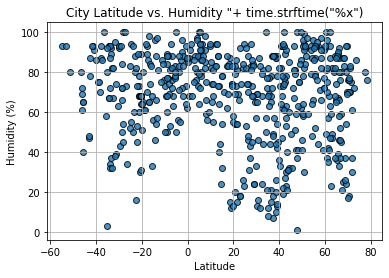

In [47]:
# Build scatter plot for Latitude vs Humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Humidity "+ time.strftime("%x")')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# Plot Latitude vs Couldiness

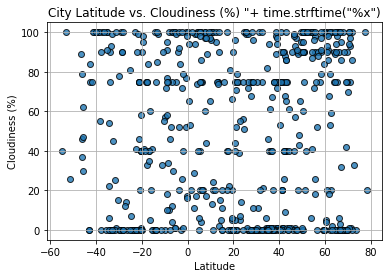

In [48]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Cloudiness (%) "+ time.strftime("%x")')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# Plot Latitude vs Wind Speed

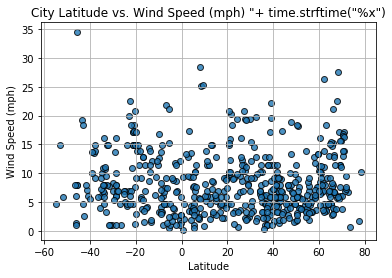

In [49]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Wind Speed (mph) "+ time.strftime("%x")')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [63]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
# Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
# Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
# Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [56]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                  Bodden Town
Country                        KY
Date          2020-06-20 01:27:07
Lat                         19.28
Lng                        -81.25
Max Temp                       86
Humidity                       74
Cloudiness                     20
Wind Speed                   5.82
Name: 13, dtype: object

In [57]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4       True
       ...  
555     True
556     True
557    False
558     True
559     True
Name: Lat, Length: 560, dtype: bool

In [59]:
# Cretae Northern and SOuthern Hemisphere data frames
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

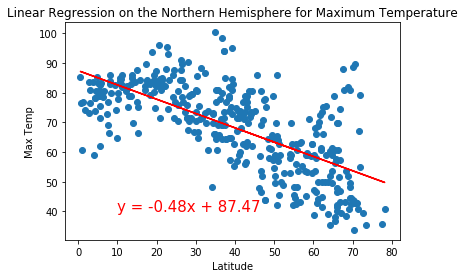

In [64]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df["Max Temp"]

# call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp', (10,40))


# Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

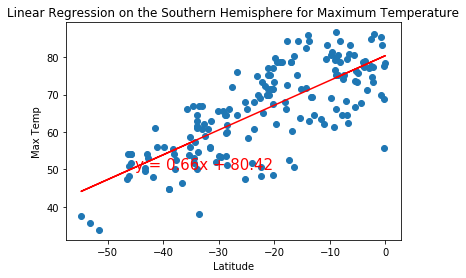

In [70]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df["Max Temp"]

# call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp', (-45,50))


# Findings

Revise the accordingly 

The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

# Perform Linear Regression on the Percent Humidity for the Northern & Southern Hemisphere

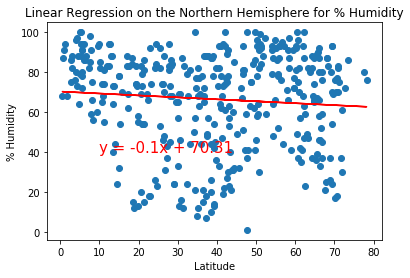

In [79]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df["Humidity"]

# call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity', (10,40))


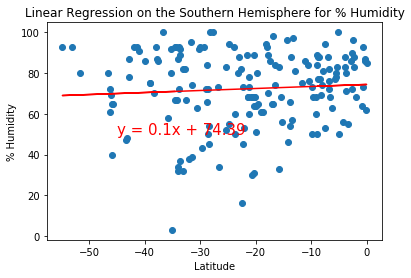

In [80]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df["Humidity"]

# call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity', (-45,50))


# Findings:

The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

# Perform Linear Regression on the Percent Cloudiness for the Northern & Southern Hemisphere

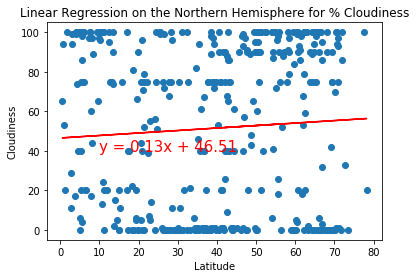

In [81]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Cloudiness', 'Cloudiness', (10,40))


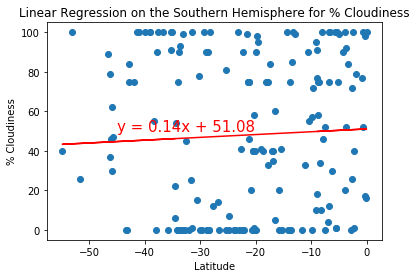

In [82]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness', (-45,50))


# Findings 

The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. 

# Perform Linear Regression on the Wind Speed for the Northern Hemisphere

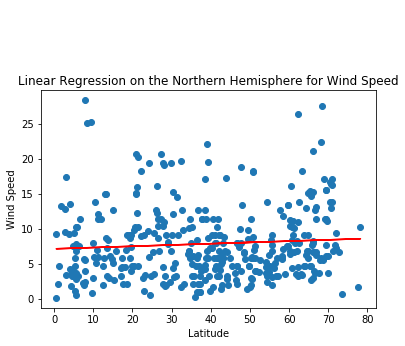

In [83]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed', (10,40))


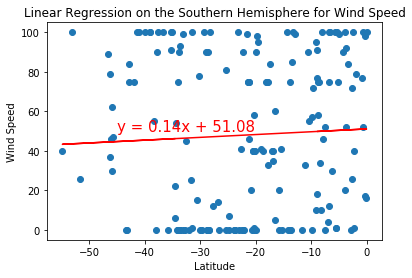

In [84]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed', (-45,50))


# Findings

The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here . This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots.